## Instructions

- Download the Anaconda distribution (2.7 or 3.5) of Python from https://www.continuum.io/downloads


- Setup a Quandl account and note your API key: https://www.quandl.com/


- Install the following packages from Conda's pip (on osx: ~/anaconda/bin/pip install some_package)


    - seaborn
    - Quandl
    - pandas-datareader
    - pydataset
 
 
- Open a notbook by typing 'jupyter notebook' in the terminal and then clicking the "New" button in the window that has opened in your browser


- Complete the following tasks to the best of your ability (pay special attention to the modules imported into the namespace and use the associated docs and stackoverflow to get some ideas (e.g. http://pandas.pydata.org/, http://statsmodels.sourceforge.net/, https://stanford.edu/~mwaskom/software/seaborn/, ...)


- After writing the requisite code for each task, in a new markdown cell explain in your own words what was being done and interpret the implications of the action if applicable. For example, if columns are being renamed explain why you might do this or if a model has been created feel free to interpret the model and/or the model's output/test statistics.




- **If you prefer working in R, follow these instructions:**

    - Run the following command as sudo/admin from your terminal: conda install -c r ipython-notebook r-irkernel
    - Now you should see the dropdown option to create R notebooks (as opposed to IPython) after starting Jupyter
    - Copy over the tasks and paste them into newly created markdown cells
    - Additional info: https://github.com/IRkernel/IRkernel

In [1]:
# import modeules into namespace
import numpy as np
import pandas as pd
import Quandl
from itertools import combinations
from datetime import datetime
from datetime import timedelta
from seaborn.linearmodels import corrplot
import pandas_datareader.data as web
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import scipy.stats as scs
from pydataset import data as pds

# plotting preferences
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.style.use('bmh')

# format notebook output
from IPython.display import HTML, Javascript, display
display(Javascript("IPython.OutputArea.prototype._should_scroll=function(){return false;};"))
pd.set_option('display.max_columns', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams['figure.figsize'] = (10.0, 5.0)

# profiling tools
#%load_ext autotime

<IPython.core.display.Javascript object>

**Task 1:** Pulling data from an API

**a)** Set your Quandl API key as a variable to use as the 'authtoken' arg 

**b)** Pull 'Venture Capital Investments By Stage - Number of Deals - Quarterly' data

**c)** Pull 'Venture Capital Investments By Stage - Quarterly' data

**d)** Pull 'PHLX Semiconductor (SOX)' data, make sure the data has a quarterly frequency

In [2]:
# set Quandl api key
api_key = 'mbLbDs2exaw2uANsRGYo'

# Venture Capital Investments By Stage - Number of Deals - Quarterly
df1 = Quandl.get('NVCA/VENTURE_3_09D', authtoken=api_key)
print df1.info()

# Venture Capital Investments By Stage - Quarterly
df2 = Quandl.get('NVCA/VENTURE_3_09C', authtoken=api_key)
print df2.info()

# PHLX Semiconductor (SOX)
df3 = Quandl.get('NASDAQOMX/SOX', collapse='quarterly', authtoken=api_key) #transformation="rdiff"
print df3.info()

# Lending Club stock
start = datetime(2015, 1, 1)
end = datetime(2016, 11, 30)
df4 = web.DataReader('LC', 'yahoo', start, end)
print df4.info()

# OnDeck Capital stock
df5 = web.DataReader('ONDK', 'yahoo', start, end)
print df5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126 entries, 1985-03-31 to 2016-06-30
Data columns (total 5 columns):
Seed           126 non-null float64
Early Stage    126 non-null float64
Expansion      126 non-null float64
Later Stage    126 non-null float64
Total          126 non-null float64
dtypes: float64(5)
memory usage: 5.9 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126 entries, 1985-03-31 to 2016-06-30
Data columns (total 5 columns):
Seed           126 non-null float64
Early Stage    126 non-null float64
Expansion      126 non-null float64
Later Stage    126 non-null float64
Total          126 non-null float64
dtypes: float64(5)
memory usage: 5.9 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2004-09-30 to 2017-03-31
Data columns (total 5 columns):
Index Value              50 non-null float64
High                     50 non-null float64
Low                      50 non-null float64
Total Market Value       50 non-null float64
Di

**Task 2:** Dropping unnecessary columns

**a)** From df1, drop the 'Total' column

**b)** From df2, drop the 'Total' column

**c)** From df3, drop the following columns: 'Index Value', 'High', 'Low', 'Dividend Market Value'

**d)** From df4 and df5, drop the following columns: 'Open', 'High', 'Low', 'Close'

In [3]:
#2a
df1.drop('Total', axis = 1, inplace = True)

#2b
df2.drop('Total', axis = 1, inplace = True)

#2c
df3.drop(['Index Value', 'High', 'Low', 'Dividend Market Value'], axis = 1, inplace = True)

#2d
for df in [df4, df5]:
    df.drop(['Open', 'High', 'Low', 'Close'], axis = 1, inplace = True)

**Task 3:** Renaming columns

**a)** Use list comprehension to replace white spaces with underscores and convert the string to lowercase

**b)** For df1 and df2, add column name suffixes '_cnt' and '_amt' respectively 

**c)** For df4 and df5, add column name prefixes 'lc_' and 'od_' respectively 

In [4]:
for df in [df1, df2, df3, df4, df5]:
    print(list(df))

['Seed', 'Early Stage', 'Expansion', 'Later Stage']
['Seed', 'Early Stage', 'Expansion', 'Later Stage']
['Total Market Value']
['Volume', 'Adj Close']
['Volume', 'Adj Close']


In [5]:
dfs = [df1, df2, df3, df4, df5]

#3a
for df in dfs:
    df.columns = [colname.lower().replace(' ', '_') for colname in list(df)]

#3b
df1.columns = [colname + '_cnt' for colname in list(df1)]
df2.columns = [colname + '_amt' for colname in list(df2)]

#3c
df4.columns = ['lc_' + colname for colname in list(df4)]
df5.columns = ['od_' + colname for colname in list(df5)]

for i, df in enumerate(dfs):
    print ('df{0} new column names:'.format(i+1)), list(df)

df1 new column names: ['seed_cnt', 'early_stage_cnt', 'expansion_cnt', 'later_stage_cnt']
df2 new column names: ['seed_amt', 'early_stage_amt', 'expansion_amt', 'later_stage_amt']
df3 new column names: ['total_market_value']
df4 new column names: ['lc_volume', 'lc_adj_close']
df5 new column names: ['od_volume', 'od_adj_close']


**Comment:** Removing spaces is common for convenience of pulling single columns from pandas.

Adding prefixes/suffixes is necessary to join datasets together if variables have the same names.

**Task 4:** Calculating new columns with Pandas methods and lambda functions

**a)** Convert the 'total_market_value' column to the percent change (from one observation to the next) and name it 'tmv_pct'

**b)** Apply a lambda function to create a binary (0 or 1) column; if value is greater than 0 then 1 else 0 and name it 'tmv_pct_flag'

**c)** Use vectorized computation (native to pandas) to calculate the log returns using the 'adj_close' column and make sure to add column name prefixes again

In [6]:
#4a
df3['tmv_pct'] = df3.total_market_value.pct_change()

#4b
df3['tmv_pct_flag'] = df3.tmv_pct.apply(lambda val: 1 if val > 0 else 0)

#4c
df4['lc_ac_pct'] = df4.lc_adj_close.pct_change()
df4['lc_ac_lr'] = np.log(1 + df4.lc_ac_pct)

df5['od_ac_pct'] = df5.od_adj_close.pct_change()
df5['od_ac_lr'] = np.log(1 + df5.od_ac_pct)

#quick visual check of new dfs
print 'df3:'
df3.head()

df3:


total_market_value  tmv_pct  tmv_pct_flag
Trade Date                                           
2004-09-30      1488381628.000      nan             0
2004-12-31      1614471281.000    0.085             1
2005-03-31      1636552098.000    0.014             1
2005-06-30      1297260598.000   -0.207             0
2005-09-30      1304805876.000    0.006             1

In [7]:
print 'df4:'
df4.head()

df4:


lc_volume  lc_adj_close  lc_ac_pct  lc_ac_lr
Date                                                    
2015-01-02     881800        24.930        nan       nan
2015-01-05    2838500        24.000     -0.037    -0.038
2015-01-06    3219900        22.890     -0.046    -0.047
2015-01-07    4169800        22.880     -0.000    -0.000
2015-01-08    3580100        23.160      0.012     0.012

In [8]:
print 'df5:'
df5.head()

df5:


od_volume  od_adj_close  od_ac_pct  od_ac_lr
Date                                                    
2015-01-02     613300        23.900        nan       nan
2015-01-05     337700        22.500     -0.059    -0.060
2015-01-06     667100        22.210     -0.013    -0.013
2015-01-07     559300        22.280      0.003     0.003
2015-01-08     340600        22.730      0.020     0.020

**Task 5:** Combining dataframes

**a)** Use the Pandas merge or concatonate operation to combine the three (df1, df2, and df3) dataframes on their common date axis; name the new dataframe 'df'.

**b)** Do the same for df4 and df5; name the new dataframe 'df2'.

In [9]:
#5a
df = pd.concat([df1, df2, df3], axis=1)

#5b
df2 = pd.concat([df4, df5], axis=1)

#quick visual check to confirm results
print 'df:'
df.head()

df:


seed_cnt  early_stage_cnt  expansion_cnt  later_stage_cnt  \
1985-03-31   110.000           88.000        138.000           65.000   
1985-06-30    88.000           69.000        122.000           40.000   
1985-09-30    61.000           60.000        114.000           37.000   
1985-12-31    98.000           73.000        151.000           31.000   
1986-03-31   134.000          111.000        166.000           60.000   

            seed_amt  early_stage_amt  expansion_amt  later_stage_amt  \
1985-03-31   153.000           96.300        219.500          154.400   
1985-06-30   146.500          185.300        319.600           89.400   
1985-09-30    93.700          106.300        312.800          164.400   
1985-12-31   133.000          129.900        393.700           78.500   
1986-03-31   185.600          129.600        270.000          125.300   

            total_market_value  tmv_pct  tmv_pct_flag  
1985-03-31                 nan      nan           nan  
1985-06-30                 nan      nan           nan  
1985-09-30                 nan      nan           nan  
1985-12-31                 nan      nan           nan  
1986-03-31                 nan      nan           nan

In [10]:
print 'df2:'
df2.head()

df2:


lc_volume  lc_adj_close  lc_ac_pct  lc_ac_lr  od_volume  \
Date                                                                  
2015-01-02     881800        24.930        nan       nan     613300   
2015-01-05    2838500        24.000     -0.037    -0.038     337700   
2015-01-06    3219900        22.890     -0.046    -0.047     667100   
2015-01-07    4169800        22.880     -0.000    -0.000     559300   
2015-01-08    3580100        23.160      0.012     0.012     340600   

            od_adj_close  od_ac_pct  od_ac_lr  
Date                                           
2015-01-02        23.900        nan       nan  
2015-01-05        22.500     -0.059    -0.060  
2015-01-06        22.210     -0.013    -0.013  
2015-01-07        22.280      0.003     0.003  
2015-01-08        22.730      0.020     0.020

**Task 6:** Generating descriptive statistics

**a)** Run some descriptive statistics on your data

In [11]:
print 'df summary:'
df.describe()

df summary:


seed_cnt  early_stage_cnt  expansion_cnt  later_stage_cnt  seed_amt  \
count   126.000          126.000        126.000          126.000   126.000   
mean     93.667          257.881        285.056          150.437   281.319   
std      41.543          180.652        173.186           88.618   208.790   
min      30.000           38.000         96.000           31.000    45.800   
25%      64.250           94.250        158.500           62.500   140.233   
50%      85.000          222.000        265.000          152.000   215.727   
75%     116.750          350.750        333.500          219.750   369.421   
max     250.000          793.000       1007.000          339.000  1232.626   

       early_stage_amt  expansion_amt  later_stage_amt  total_market_value  \
count          126.000        126.000          126.000              50.000   
mean          1454.500       2590.046         1538.088    289937912799.820   
std           1585.404       3040.119         1311.665    275934465618.728   
min             96.300        208.000           57.900      1131329203.000   
25%            190.825        434.275          176.575      1448080302.250   
50%           1041.931       2071.959         1518.407    291568094654.500   
75%           1882.058       2817.875         2454.730    569274932963.750   
max           7134.253      16505.069         4575.666    808877550454.000   

       tmv_pct  tmv_pct_flag  
count   49.000        50.000  
mean     1.817         0.660  
std     12.384         0.479  
min     -0.207         0.000  
25%     -0.025         0.000  
50%      0.022         1.000  
75%      0.087         1.000  
max     86.729         1.000

In [12]:
print 'df2 summary:'
df2.describe()

df2 summary:


lc_volume  lc_adj_close  lc_ac_pct  lc_ac_lr   od_volume  \
count      483.000       483.000    482.000   482.000     483.000   
mean   7351640.373        11.517     -0.002    -0.003  467566.253   
std    9296674.909         5.705      0.039     0.041  534551.017   
min     722600.000         3.510     -0.349    -0.430   46600.000   
25%    2952700.000         6.010     -0.021    -0.022  228500.000   
50%    4706200.000        12.000     -0.002    -0.002  324800.000   
75%    8257800.000        15.655      0.019     0.018  525250.000   
max   96011800.000        24.930      0.152     0.142 6450500.000   

       od_adj_close  od_ac_pct  od_ac_lr  
count       483.000    482.000   482.000  
mean         10.233     -0.002    -0.003  
std           5.104      0.045     0.046  
min           3.880     -0.337    -0.412  
25%           5.935     -0.022    -0.022  
50%           9.160      0.001     0.001  
75%          12.925      0.019     0.019  
max          23.900      0.276     0.244

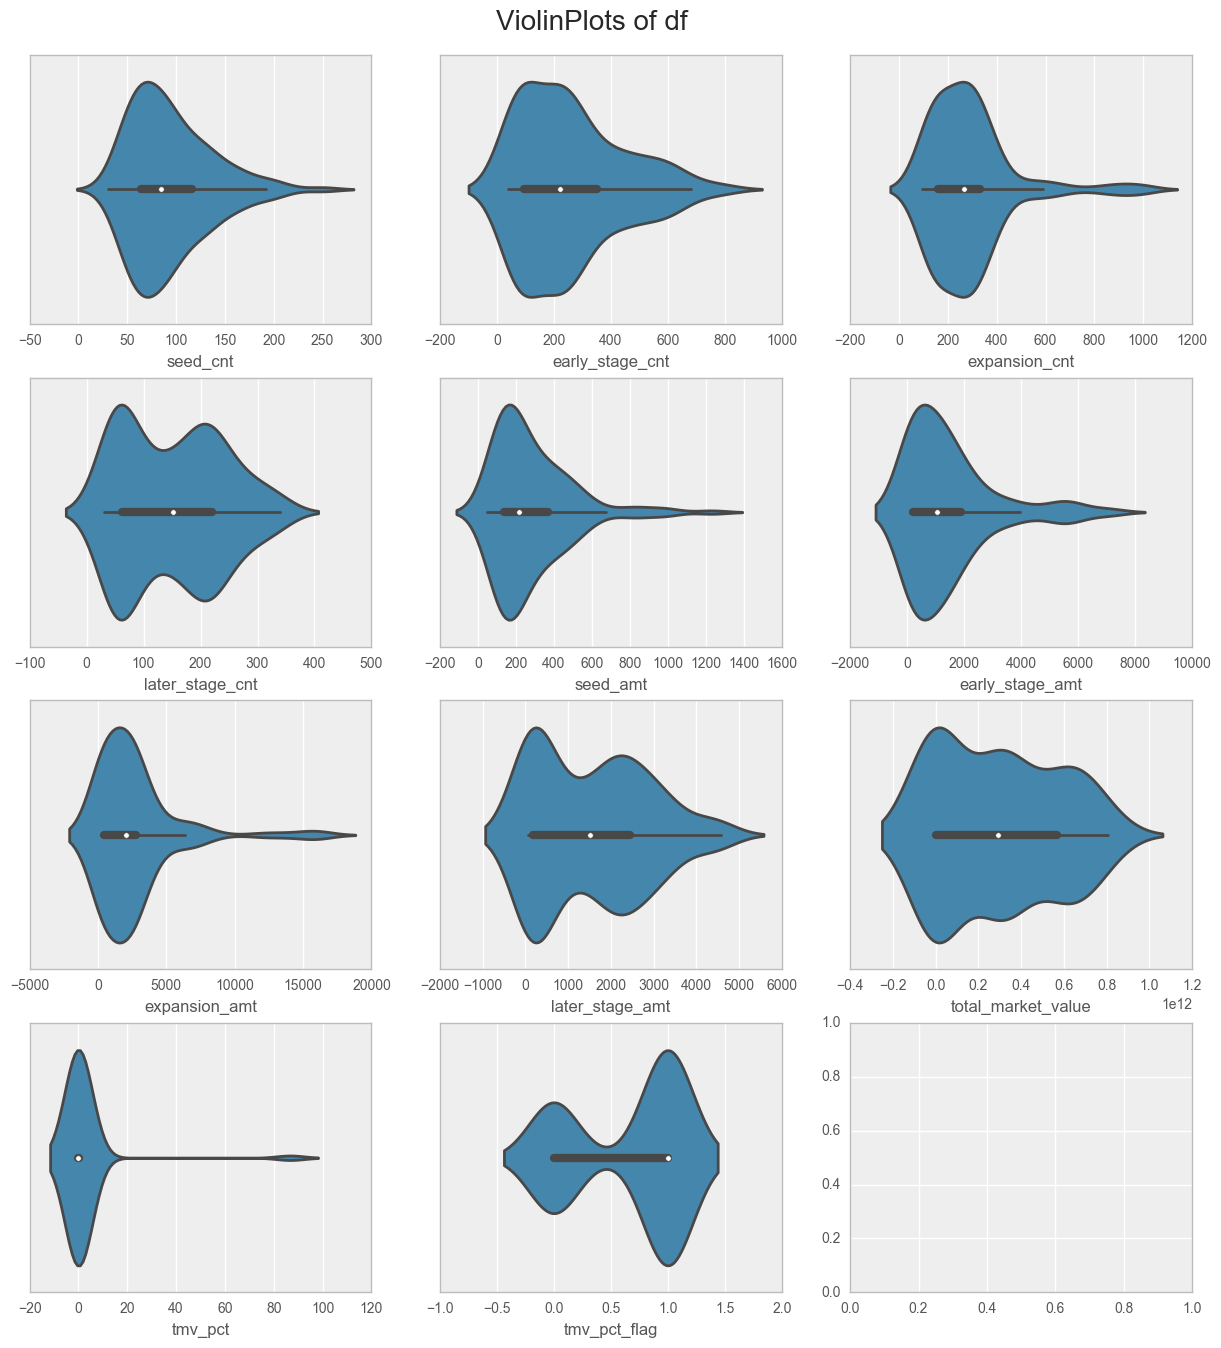

In [13]:
#Let's create violin plots

#setting subplot settings...there are 11 variables so we will do a 4x3 graph of violins
plt_height = 4
plt_width = 3
cols = list(df)
num_plts = len(cols)

#plotting
f, axarr = plt.subplots(plt_height, plt_width, figsize=(15,15))
f.suptitle('ViolinPlots of df', size = 20)
f.subplots_adjust(top = .95)

for i, col in enumerate(cols, start = 0):
    axis = axarr[divmod(i,plt_width)]
    sns.violinplot(df[col], ax = axis)
    axis.set_xlabel(col)

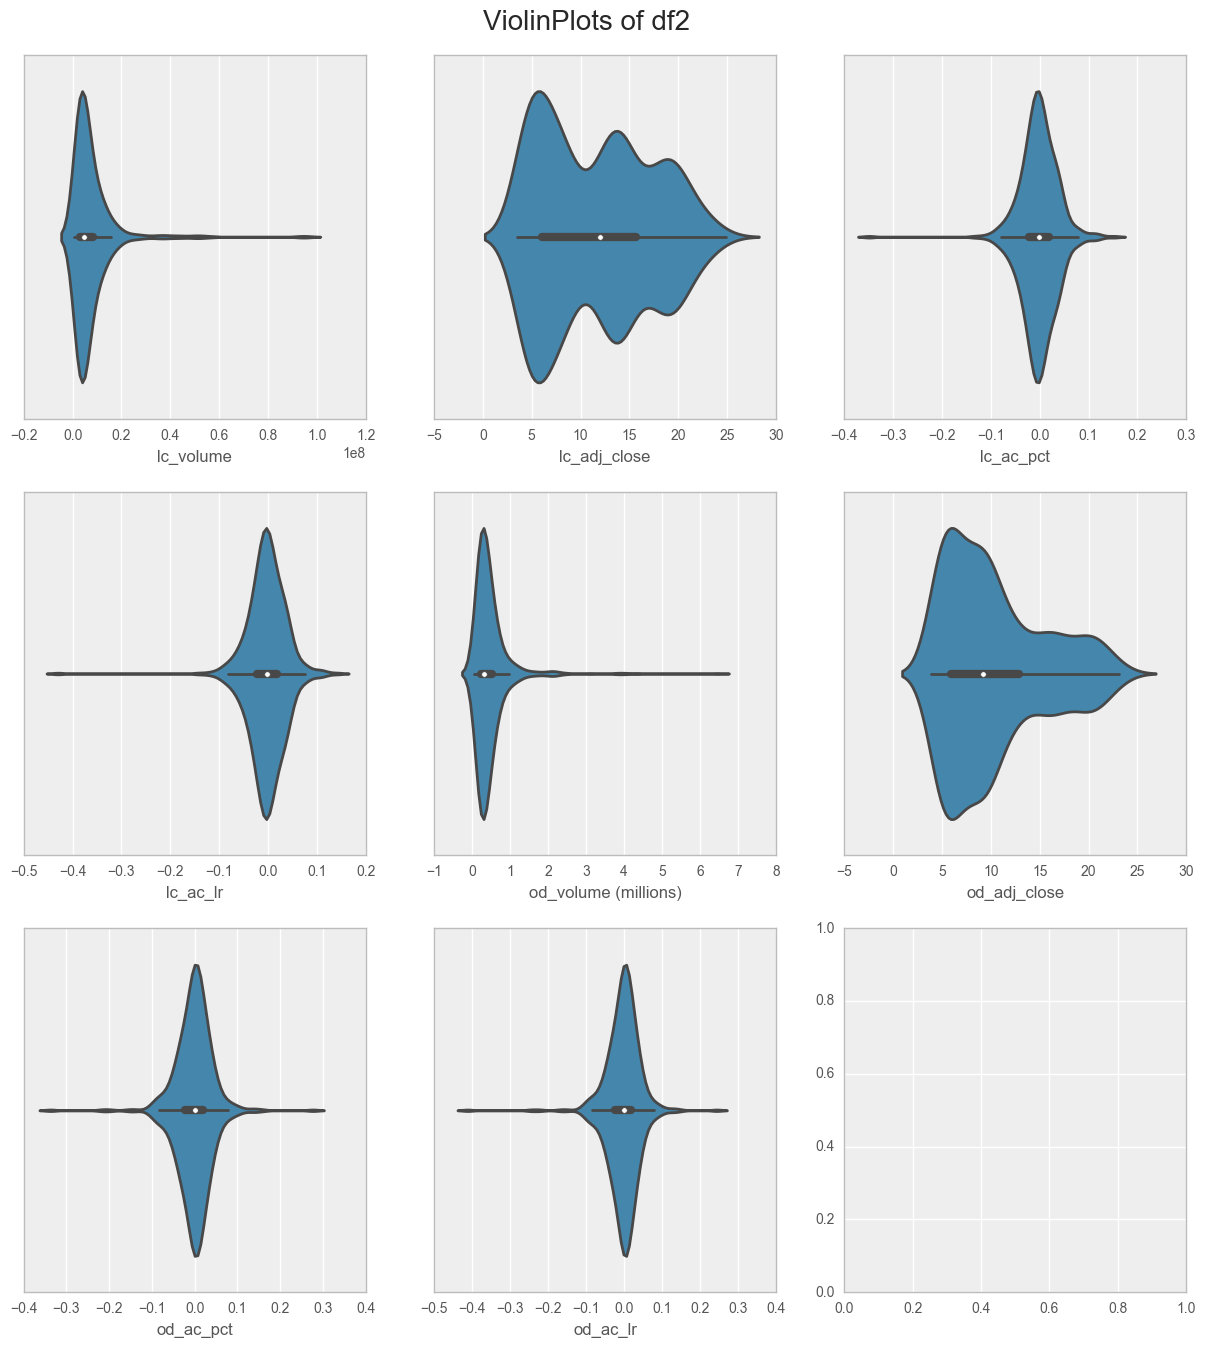

In [14]:
#setting subplot settings...there are 8 variables in df2 so we will do a 4x3 graph of violins
plt_height = 3
plt_width = 3
cols = list(df2)
num_plts = len(cols)

#plotting
f, axarr = plt.subplots(plt_height, plt_width, figsize=(15,15))
f.suptitle('ViolinPlots of df2', size = 20)
f.subplots_adjust(top = .95)

for i, col in enumerate(cols, start = 0):
    axis = axarr[divmod(i,plt_width)]
    
    #od_volume x labels were causing issues, so I just downscaled them
    if col == 'od_volume':
        sns.violinplot(df2[col]/1000000, ax = axis)
        axis.set_xlabel('od_volume (millions)')
    else:
        sns.violinplot(df2[col], ax = axis)
        axis.set_xlabel(col)

A lot of variables have extreme values

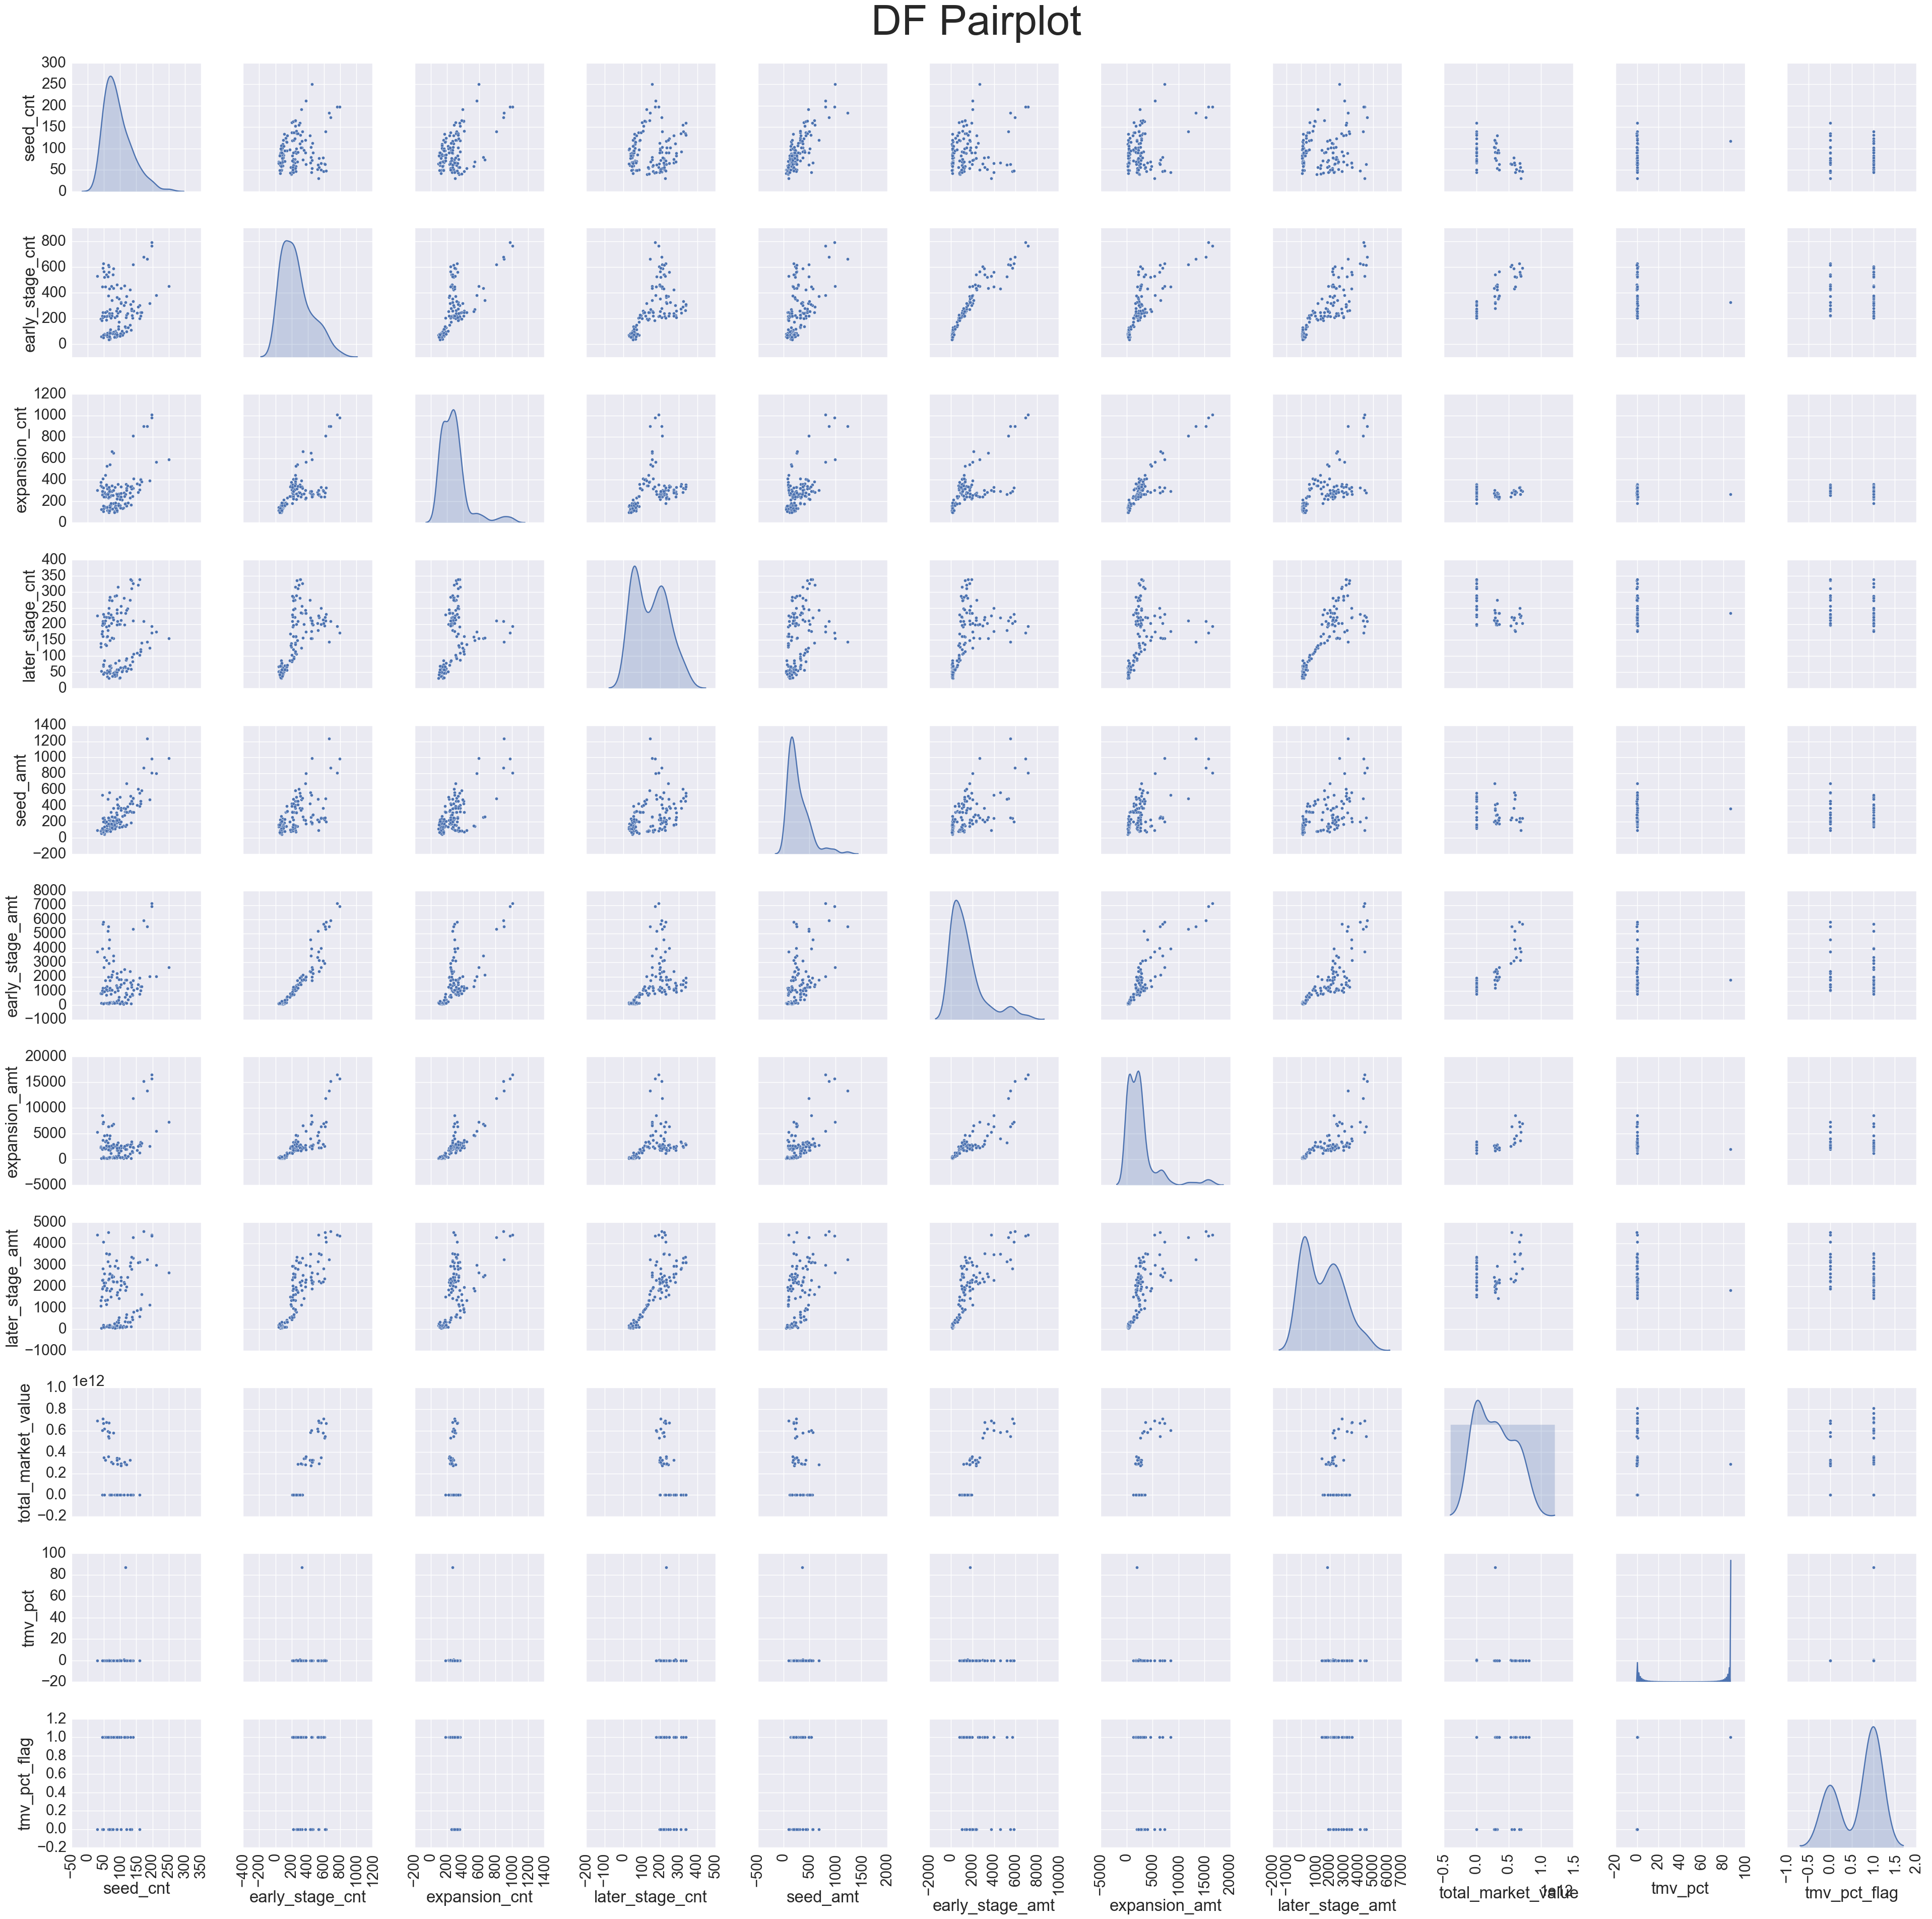

In [16]:
#plotting a pairplot

#pairplot settings
sns.set(font_scale=2.15)
g = sns.pairplot(df, size = 3.5, diag_kind = 'kde',diag_kws=dict(shade=True))

#adding rotation to x axis
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

plt.suptitle('DF Pairplot', size =60)
plt.subplots_adjust(top = .95)

#reset fontscale
sns.set(font_scale=1)

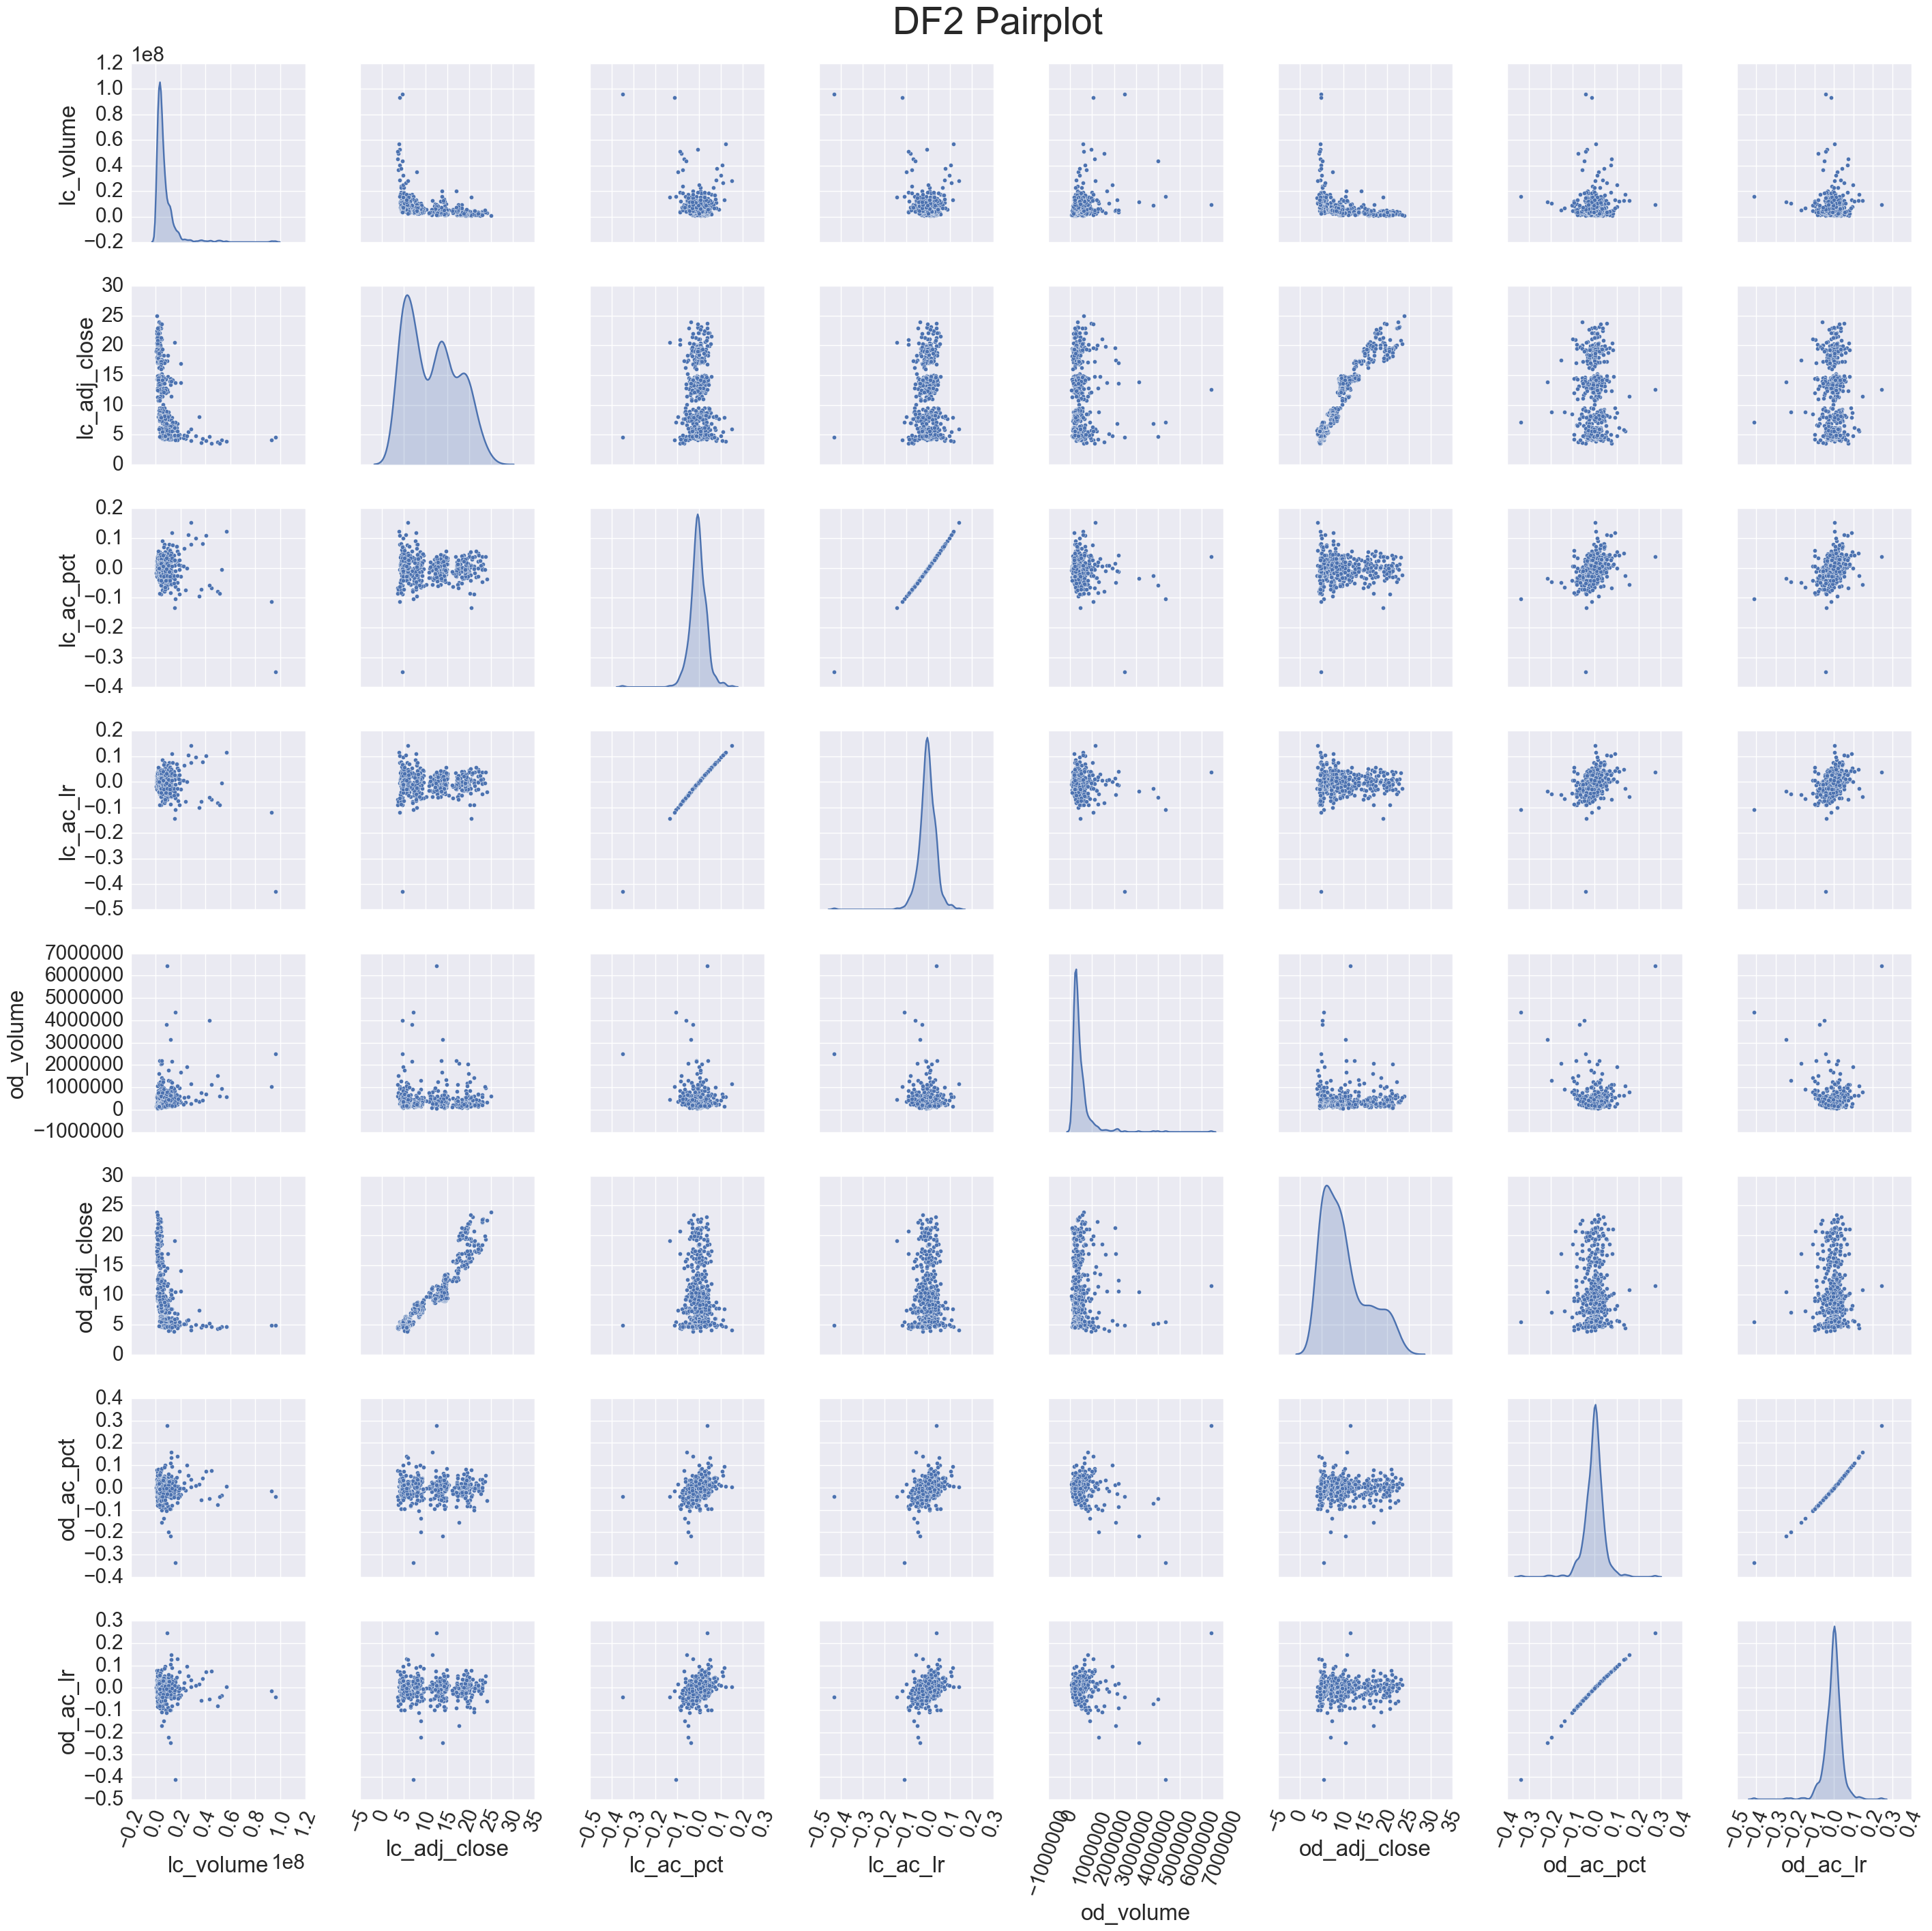

In [17]:
#pairplot settings
sns.set(font_scale=2.15)
g = sns.pairplot(df2, size = 3.5, diag_kind = 'kde',diag_kws=dict(shade=True))

#adding rotation to x axis
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(70)

plt.suptitle('DF2 Pairplot', size =40)
plt.subplots_adjust(top = .95)

#reset fontscale
sns.set(font_scale=1)

It's always good practice to graph your variables as shown in Anscombe's quartet.

**Task 7:** Generating histograms

**a)** Create histograms for each variable in 'df'

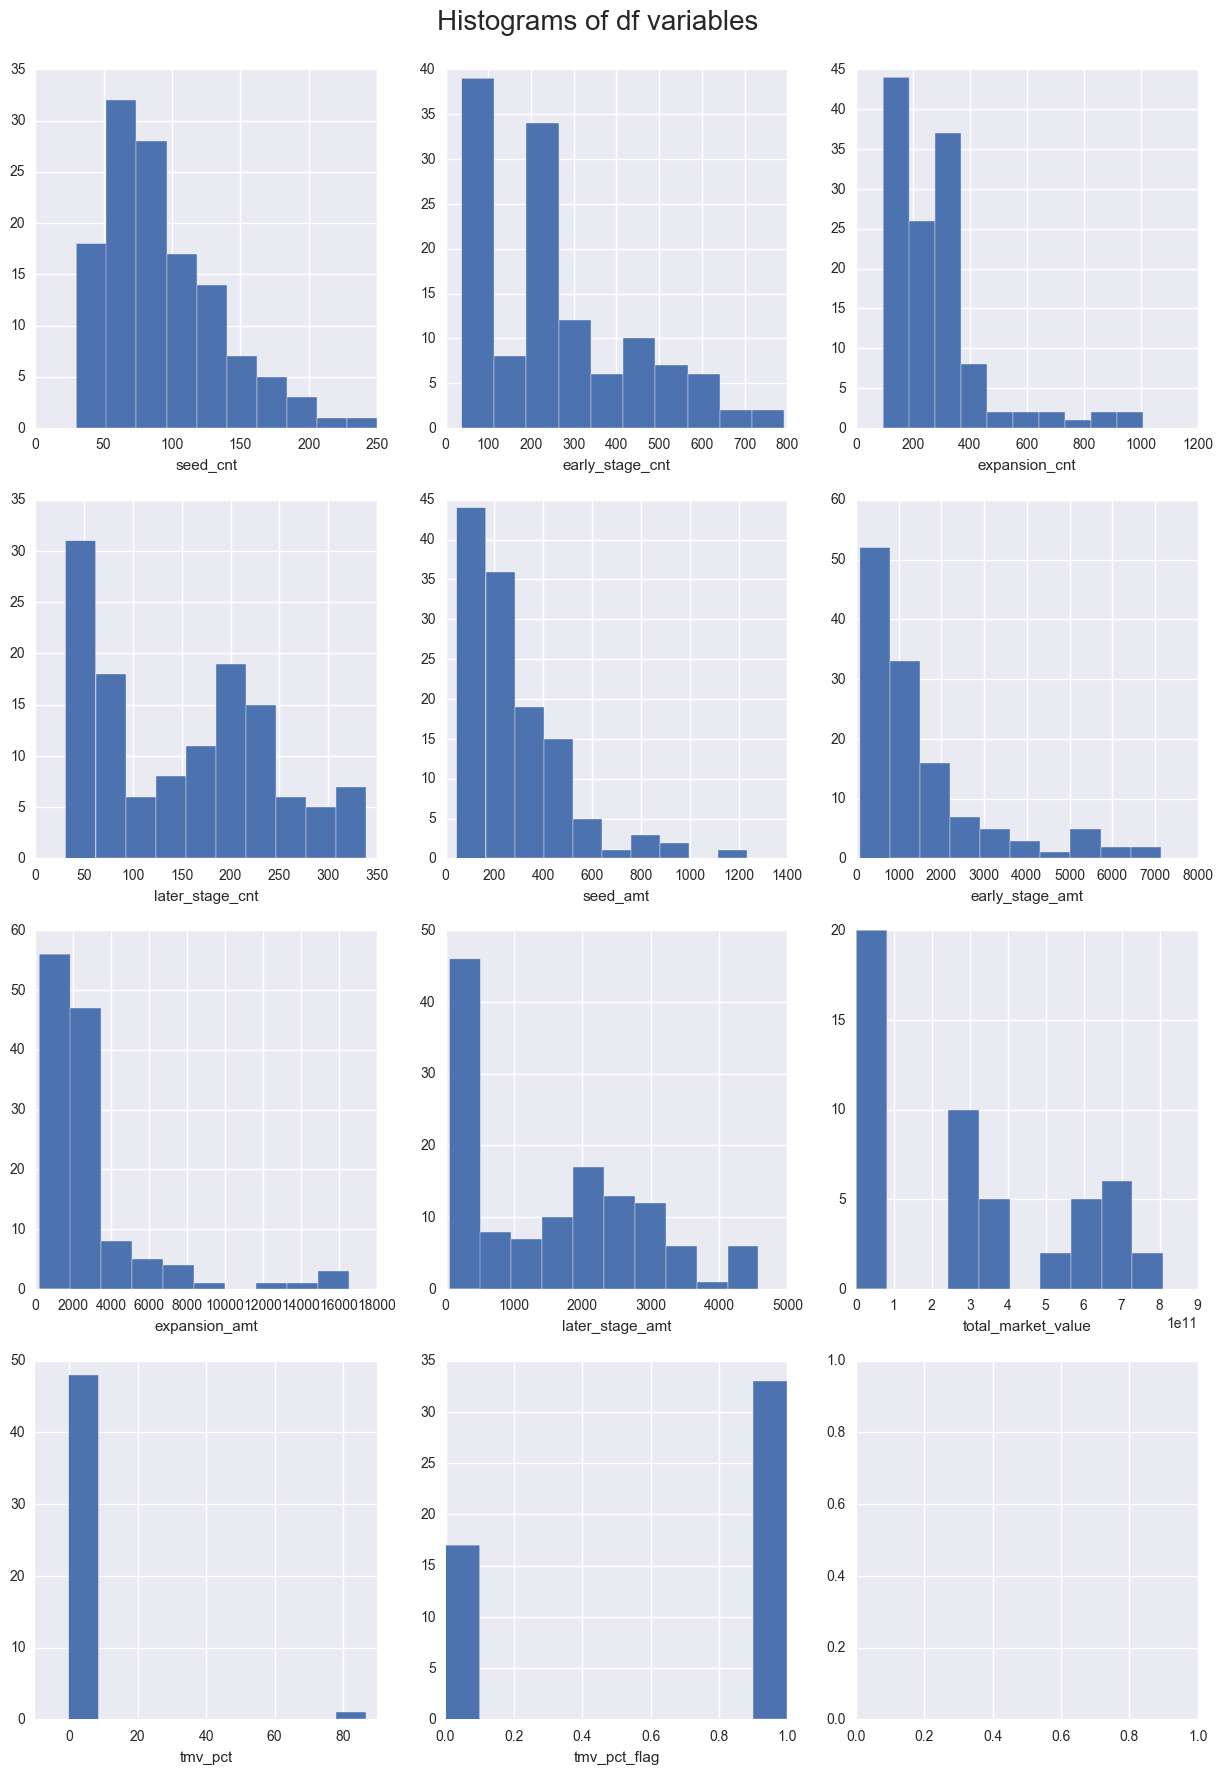

In [18]:
#7a

#setting subplot settings...there are 11 variables so we will do a 4x3 graph of histograms
#leaving it at default bin size 10 because number of rows is 129 so this seems fairly reasonable
plt_height = 4
plt_width = 3
cols = list(df)
num_plts = len(cols)

#plotting
f, axarr = plt.subplots(plt_height, plt_width, figsize=(15,20))
f.suptitle('Histograms of df variables', size = 20)
f.subplots_adjust(top = .95)

for i, col in enumerate(cols, start = 0):
    axis = axarr[divmod(i,plt_width)]
    df[col].hist(ax = axis)
    axis.set_xlabel(col)

Many of these are obviously not normally distributed (and with extreme values, as shown in the violin plots) and a few are begging for log transforms.

**Task 8:** Examining bivariate relationships

**a)** Calculate and visualize the correlation coefficients for each combination of variables

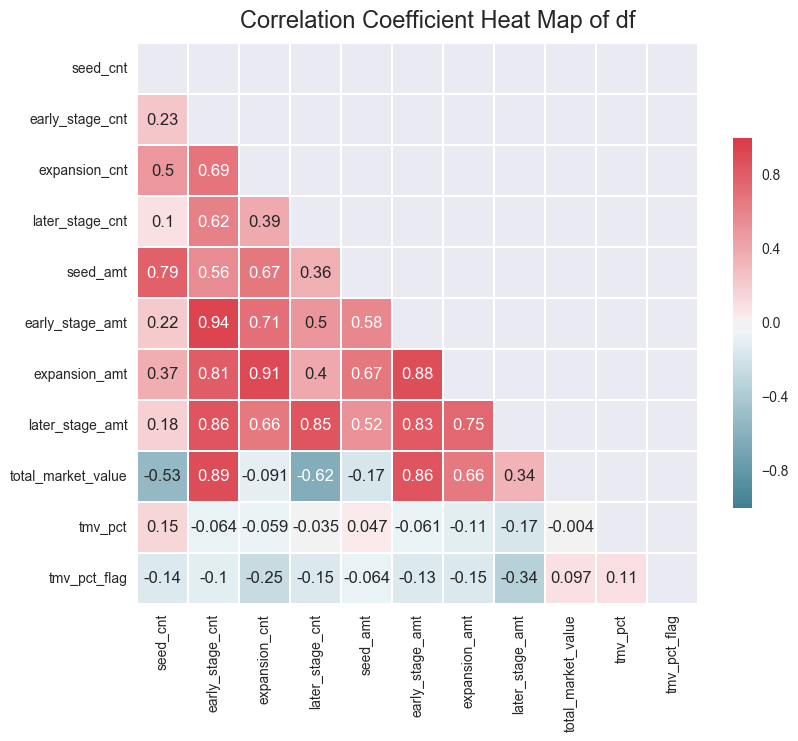

In [19]:
#using a heatmap to visualize results

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))
f.suptitle('Correlation Coefficient Heat Map of df', size = 17)
f.subplots_adjust(top = 1.05, right = 1.001)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

The correlations with tmv are interesting, but many such as high correlations of counts/amounts of earlier stages with later stages make sense.

tmv_pct is not highly correlated with any variables, which could mean there isn't much autocorrelation.

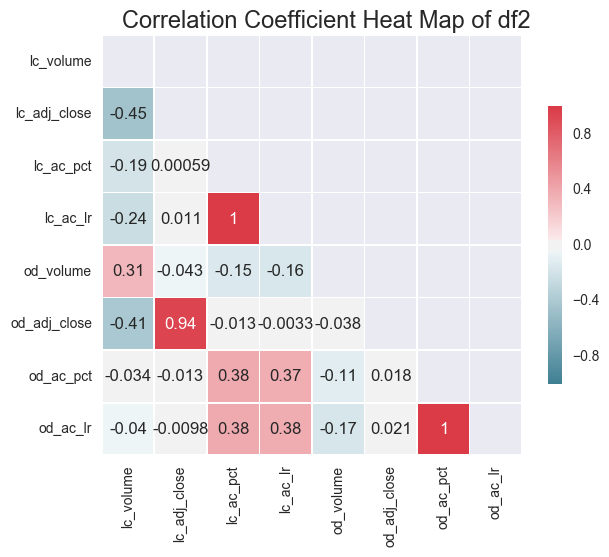

In [20]:
#using a heatmap to visualize results

# Compute the correlation matrix
corr = df2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))
f.suptitle('Correlation Coefficient Heat Map of df2', size = 17)
f.subplots_adjust(top = 1.05, right = 1.001)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

**Task 9:** Interpreting and explaining results

**a)** Explain any insights that you had based on the analysis thus far.

**b)** What might some next steps be?

**9a**<br/>
* There are a few interesting bits:
    1. Lots of correlated values in df, except for total market value percent change, which could indicate lack of autocorrelation.
    2. Total market value is negatively correlated with seed count but positively with early stage. This could mean that investors are putting in much more money in early stage than seed capital.
    3. Most variables are not normally distributed


**9b**<br/>
The next step would be running some regressions. Before this, though, as we have seen, we will need to transform many of the variables to make them more normal. Furthermore, df has some heavy multicollinearity that will need to be attended to or taken into account when running regressions and interpreting results, since the sample data of correlated values can heavily influence the beta coefficients that are calculated for said values.

Also, df2 values are obviously heavily autocorrelated.

**Task 10:** Working with and visualizing time series data

**a)** Plot 'df2' log returns as a line plot

**b)** Plot 'df2' log returns as a line plot

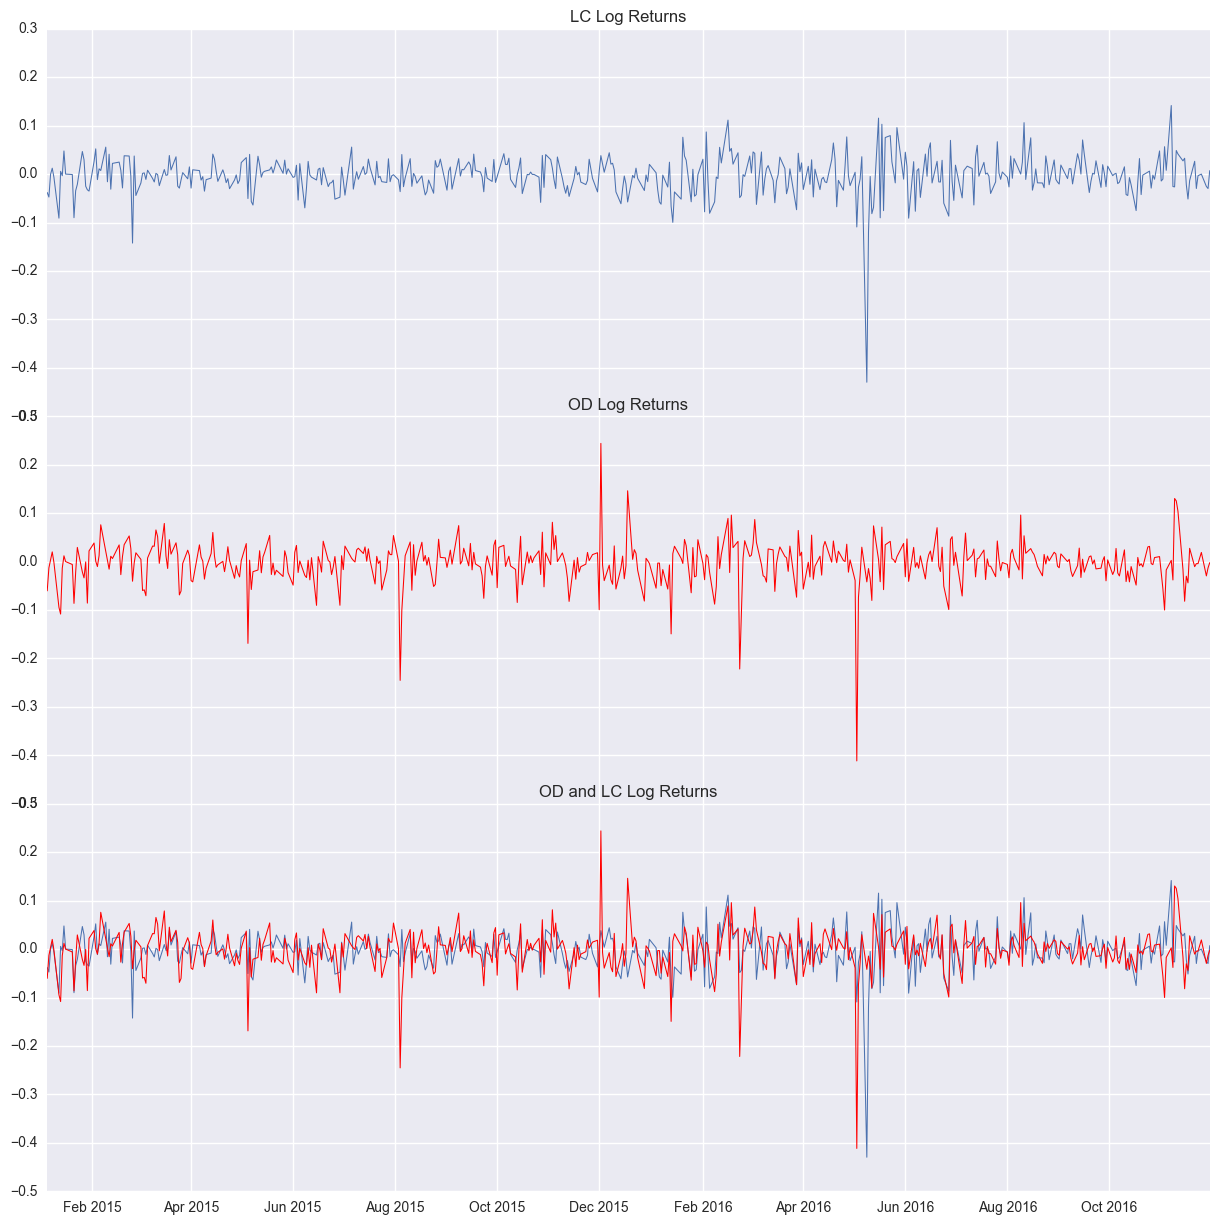

In [21]:
#plot sharing axes to accentuate differences between the values
f, (axis1, axis2, axis3) = plt.subplots(3, figsize=(15,15), sharex = True, sharey = True)
axis1.plot(df2.lc_ac_lr, lw = 0.75)
axis1.set_title('LC Log Returns')
axis2.plot(df2.od_ac_lr, color = 'r', lw = 0.75)
axis2.set_title('OD Log Returns')
axis3.plot(df2.lc_ac_lr, lw = .75)
axis3.plot(df2.od_ac_lr, color = 'r', lw = 0.75)
axis3.set_title('OD and LC Log Returns')
f.subplots_adjust(hspace=0)

The returns are very different. As we can see in the bottom plot where both LC/OD are overlaid, spikes by one are not reciprocated by the other.

**Task 11:** Identifying outliers

**a)** Create a column called 'lc_2_std' that holds a boolean value that identifies whether or not an observation is within 2 standard deviaitions. 

**b)** Create a column called 'od_log_returns' that holds a boolean value that identifies whether or not an observation is within 2 standard deviaitions. 

In [22]:
#helper function for bounds within x stds
def std_bounds(stds, values):
    std = np.std(values)
    mean = np.mean(values)
    lower = mean - std*stds
    upper = mean + std*stds
    return lower, upper

#get bounds
lc_lower, lc_upper = std_bounds(2, df2.lc_ac_lr)
od_lower, od_upper = std_bounds(2, df2.od_ac_lr)

#add boolean column based on bounds
df2['lc_2_std'] = df2.lc_ac_lr.apply(lambda x: 1 if lc_lower <= x <= lc_upper else 0)
df2['od_2_std'] = df2.od_ac_lr.apply(lambda x: 1 if od_lower <= x <= od_upper else 0)

df2.head()

lc_volume  lc_adj_close  lc_ac_pct  lc_ac_lr  od_volume  \
Date                                                                  
2015-01-02     881800        24.930        nan       nan     613300   
2015-01-05    2838500        24.000     -0.037    -0.038     337700   
2015-01-06    3219900        22.890     -0.046    -0.047     667100   
2015-01-07    4169800        22.880     -0.000    -0.000     559300   
2015-01-08    3580100        23.160      0.012     0.012     340600   

            od_adj_close  od_ac_pct  od_ac_lr  lc_2_std  od_2_std  
Date                                                               
2015-01-02        23.900        nan       nan         0         0  
2015-01-05        22.500     -0.059    -0.060         1         1  
2015-01-06        22.210     -0.013    -0.013         1         1  
2015-01-07        22.280      0.003     0.003         1         1  
2015-01-08        22.730      0.020     0.020         1         1

A mask like this can be used for outlier elimination.

**Task 12:** Filtering dataframes

**a)** Plot overlapping histograms with 25 bins for 'lc_log_returns' and 'od_log_returns'

**b)** Plot overlapping histograms with 25 bins for 'lc_log_returns' and 'od_log_returns', but only for obervations that were within 2 standard deviations 

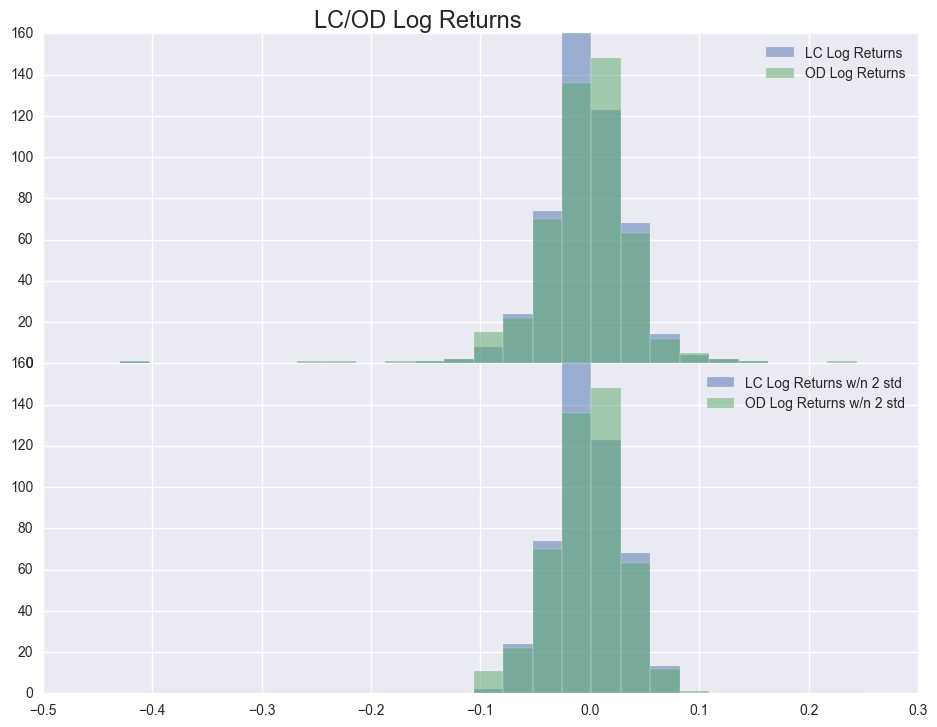

In [50]:
#we will plot on the same axes to show the change in frequencies after outlier elimination
#using 50 bins for granularity

#using the same axes in a subplot
f, (axis1, axis2) = plt.subplots(2, figsize=(10,8), sharex = True, sharey = True)

#setting mask
lc_2std = df2.lc_ac_lr[df2.lc_2_std > 0]
od_2std = df2.od_ac_lr[df2.od_2_std > 0]

#using the range of the original values to show the difference after elimination
min_range = np.min(pd.concat([df2.lc_ac_lr, df2.od_ac_lr]))
max_range = np.max(pd.concat([df2.lc_ac_lr, df2.od_ac_lr]))
num_bins = 25

#plot
(n, bins, patches) = axis1.hist(df2.lc_ac_lr.dropna(), range =(min_range, max_range), bins = num_bins, alpha=0.5, label='LC Log Returns')
axis1.hist(df2.od_ac_lr.dropna(), range =(min_range, max_range), bins = num_bins, alpha=0.5, label='OD Log Returns')
axis1.legend(loc='upper right',prop={'size':10})

axis2.hist(lc_2std.dropna(), range =(min_range, max_range), bins = num_bins, alpha=0.5, label='LC Log Returns w/n 2 std')
axis2.hist(od_2std.dropna(), range =(min_range, max_range), bins = num_bins, alpha=0.5, label='OD Log Returns w/n 2 std')
axis2.legend(loc='upper right',prop={'size':10})

f.subplots_adjust(hspace=0)
f.suptitle('LC/OD Log Returns', size = 17)
f.subplots_adjust(top = .95, right = 1.0)

**Task 13:** Windowing functions

**a)** Calculate a moving average on 'lc_adj_close' where the window is 10

**b)** Calculate a moving average on 'od_adj_close' where the window is 10

**c)** Plot these new fields

In [24]:
#13ab
window = 10
lc_adj_close_ma = df2.lc_adj_close.rolling(window = 10).mean()
od_adj_close_ma = df2.od_adj_close.rolling(window = 10).mean()

#dropping last value to get the
#Y(t+1) = (Y(t) + Y(t-1) +...+ Y(t-9))/10 calculation we are looking for
lc_adj_close_ma = pd.DataFrame(lc_adj_close_ma)[:-1]
od_adj_close_ma = pd.DataFrame(od_adj_close_ma)[:-1]

#set index to add to pandas df
index = df2.index.values[-len(lc_adj_close_ma)::]
lc_adj_close_ma = lc_adj_close_ma.set_index(index)
od_adj_close_ma = od_adj_close_ma.set_index(index)

#add to pandas df
df2['od_adj_close_ma'] = od_adj_close_ma
df2['lc_adj_close_ma'] = lc_adj_close_ma

#quick visualization
df2.head(15)

lc_volume  lc_adj_close  lc_ac_pct  lc_ac_lr  od_volume  \
Date                                                                  
2015-01-02     881800        24.930        nan       nan     613300   
2015-01-05    2838500        24.000     -0.037    -0.038     337700   
2015-01-06    3219900        22.890     -0.046    -0.047     667100   
2015-01-07    4169800        22.880     -0.000    -0.000     559300   
2015-01-08    3580100        23.160      0.012     0.012     340600   
2015-01-09    2107700        23.010     -0.006    -0.006     360700   
2015-01-12    4208800        21.010     -0.087    -0.091     515500   
2015-01-13    4730300        21.130      0.006     0.006    1442700   
2015-01-14    3836500        21.060     -0.003    -0.003     605000   
2015-01-15    3429900        22.090      0.049     0.048     679100   
2015-01-16    1201300        22.090      0.000     0.000     157200   
2015-01-20    1782000        22.070     -0.001    -0.001     709800   
2015-01-21    3355200        20.170     -0.086    -0.090     840100   
2015-01-22    3427700        19.490     -0.034    -0.034     416100   
2015-01-23    3467300        19.080     -0.021    -0.021     538000   

            od_adj_close  od_ac_pct  od_ac_lr  lc_2_std  od_2_std  \
Date                                                                
2015-01-02        23.900        nan       nan         0         0   
2015-01-05        22.500     -0.059    -0.060         1         1   
2015-01-06        22.210     -0.013    -0.013         1         1   
2015-01-07        22.280      0.003     0.003         1         1   
2015-01-08        22.730      0.020     0.020         1         1   
2015-01-09        22.690     -0.002    -0.002         1         1   
2015-01-12        20.650     -0.090    -0.094         0         1   
2015-01-13        18.530     -0.103    -0.108         1         0   
2015-01-14        18.280     -0.013    -0.014         1         1   
2015-01-15        18.500      0.012     0.012         1         1   
2015-01-16        18.500      0.000     0.000         1         1   
2015-01-20        18.390     -0.006    -0.006         1         1   
2015-01-21        16.870     -0.083    -0.086         0         1   
2015-01-22        16.500     -0.022    -0.022         1         1   
2015-01-23        16.990      0.030     0.029         1         1   

            od_adj_close_ma  lc_adj_close_ma  
Date                                          
2015-01-02              nan              nan  
2015-01-05              nan              nan  
2015-01-06              nan              nan  
2015-01-07              nan              nan  
2015-01-08              nan              nan  
2015-01-09              nan              nan  
2015-01-12              nan              nan  
2015-01-13              nan              nan  
2015-01-14              nan              nan  
2015-01-15              nan              nan  
2015-01-16           21.227           22.616  
2015-01-20           20.687           22.332  
2015-01-21           20.276           22.139  
2015-01-22           19.742           21.867  
2015-01-23           19.164           21.528

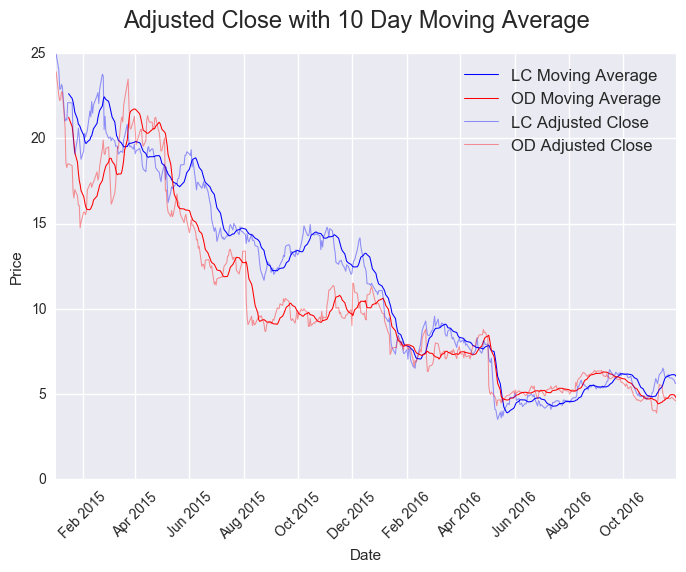

In [25]:
#plot moving avg
plt.plot(df2.lc_adj_close_ma, color = 'b', lw = .75, label = 'LC Moving Average')
plt.plot(df2.od_adj_close_ma, color = 'r', lw = 0.75, label = 'OD Moving Average')
plt.plot(df2.lc_adj_close, color = 'b', alpha = 0.4, lw = .75, label = 'LC Adjusted Close')
plt.plot(df2.od_adj_close, color = 'r', alpha = 0.4, lw = 0.75, label = 'OD Adjusted Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.suptitle('Adjusted Close with 10 Day Moving Average', size = 17)
plt.legend(loc='upper right',prop={'size':12})
plt.xticks(rotation=45)
plt.show()

10 day window looks to smooth out the data fairly well, at least at this scale

**Task 11:** Simple OLS forecasting in statsmodels

**a)** Fit a simple OLS regression using the 90 most recent data points from 'lc_adj_close_ma' and examine the results

**b)** Make a forecast for the next 30 data points and append it in a new column named 'lc_forecast'

**c)** Ensure that 'df2' has an appropriate date index to accomodate the new predictions

**d)** Plot 'lc_adj_close', 'lc_adj_close_ma', and 'lc_forecast'

**comment**: from how I am understanding the question, I will do what is asked, but it seems strange to make an ols model and a 30 day forecast using it based solely off moving average. I don't see any mention of using more standard lag variables, though, or an arima model, so I will stick with what the question is asking to do.

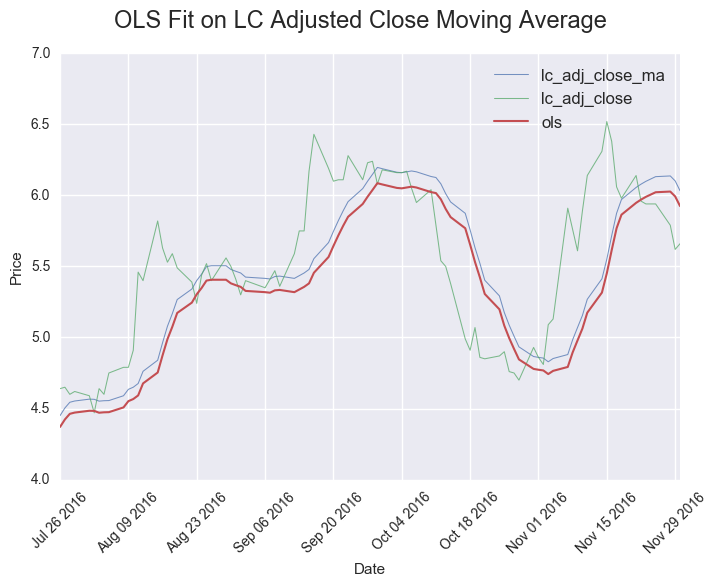

In [26]:
#11a
#fit model to the most recent 90 datapoints
model = sm.OLS(df2.lc_adj_close_ma[-90::], df2.lc_adj_close[-90::]).fit()
model_preds = model.predict(df2.lc_adj_close_ma[-90::])
ma_preds = df2.lc_adj_close_ma[-90::]
ys = df2.lc_adj_close[-90::]
index_days = df2.lc_adj_close.index.values[-90::]

#plot the model
plt.plot(ma_preds, alpha = 0.75, lw = .75, label = 'lc_adj_close_ma')
plt.plot(ys, alpha = 0.75, lw = .75, label = 'lc_adj_close')
plt.plot(index_days, model_preds, lw = 1.5, label = 'ols')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Price')
plt.suptitle('OLS Fit on LC Adjusted Close Moving Average', size = 17)
plt.legend(loc='upper right',prop={'size':12})
plt.show()

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        lc_adj_close_ma   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.606e+04
Date:                Wed, 22 Feb 2017   Prob (F-statistic):          2.62e-102
Time:                        14:43:46   Log-Likelihood:                -46.332
No. Observations:                  90   AIC:                             94.66
Df Residuals:                      89   BIC:                             97.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
lc_adj_close     0.9821      0.008    126.709      0.000         0.967     0.997
==============================================================================
Omnibus:                        1.253   Durbin-Watson:                   0.213
Prob(Omnibus):                  0.534   Jarque-Bera (JB):                0.980
Skew:                          -0.255   Prob(JB):                        0.613
Kurtosis:                       3.033   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#get RMSE of both models

from sklearn.metrics import mean_squared_error
print "model rmse: ", np.sqrt(mean_squared_error(model_preds, ys))
print "moving average rmse: ",np.sqrt(mean_squared_error(ma_preds, ys))

model rmse:  0.443543831606
moving average rmse:  0.416850932589


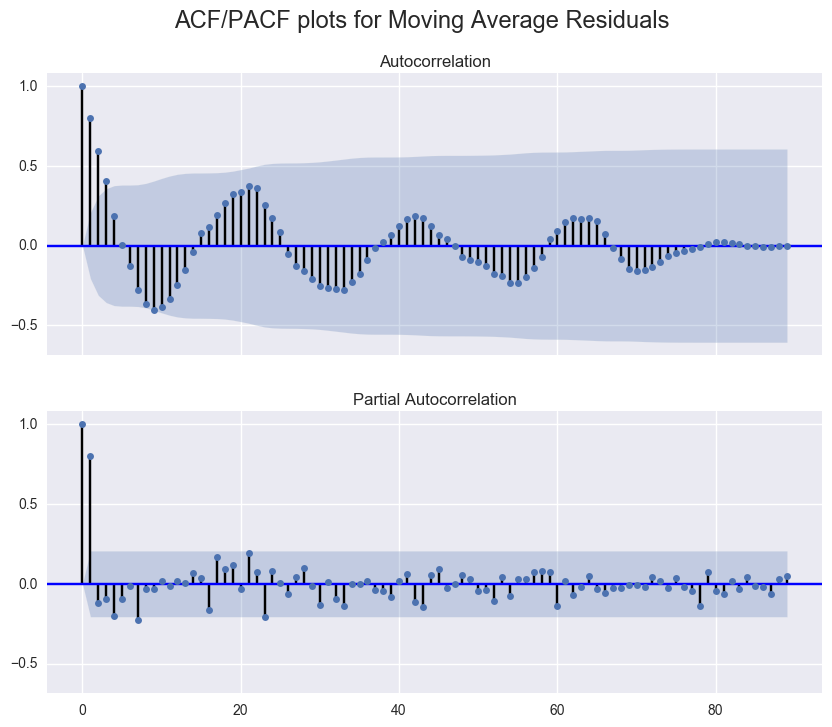

In [29]:
#Plot ACF of both models

f, (axis1, axis2) = plt.subplots(2, figsize=(10,8), sharex = True, sharey = True)
g = sm.graphics.tsa.plot_acf(np.abs(ma_preds - ys), ax = axis1)
g = sm.graphics.tsa.plot_pacf(np.abs(ma_preds - ys), ax = axis2)
plt.suptitle('ACF/PACF plots for Moving Average Residuals', size = 17)

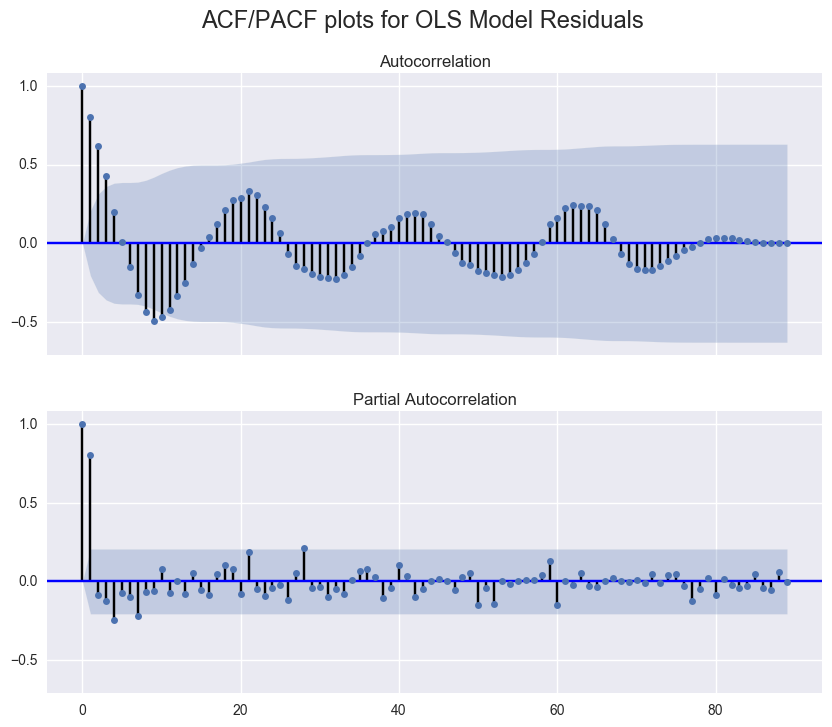

In [30]:
f, (axis1, axis2) = plt.subplots(2, figsize=(10,8), sharex = True, sharey = True)
g = sm.graphics.tsa.plot_acf(np.abs(model_preds - ys), ax = axis1)
g = sm.graphics.tsa.plot_pacf(np.abs(model_preds - ys), ax = axis2)
plt.suptitle('ACF/PACF plots for OLS Model Residuals', size = 17)

In terms of fitness, the OLS model lags in both autocorrelation and RMSE. 

In [31]:
#quick and dirty way to get the next 30 predictions using MA values. A cleaner solution can easily be found if dataset is large.
lc_forecast = []
y_appended = list(ys)
days = 30

for i in range(days):
    next_ma = np.average(y_appended[-10::])
    next_y = model.predict(next_ma)[0]
    lc_forecast.append(next_ma)
    y_appended.append(next_y)

#get date index, excluding weekends
start = ys.index[-1]
end = ys.index[-1] + timedelta(days=len(lc_forecast))
delta = timedelta(days=1)
d = start
weekend = set([5, 6])
index = []
while len(index) < days:
    if d.weekday() not in weekend:
        index.append(d)
    d += delta

#set index and append to dataframe
lc_forecast = pd.DataFrame(lc_forecast).set_index(pd.DatetimeIndex(index))
lc_forecast.columns = ['lc_forecast']

df2 = pd.concat([df2, lc_forecast])

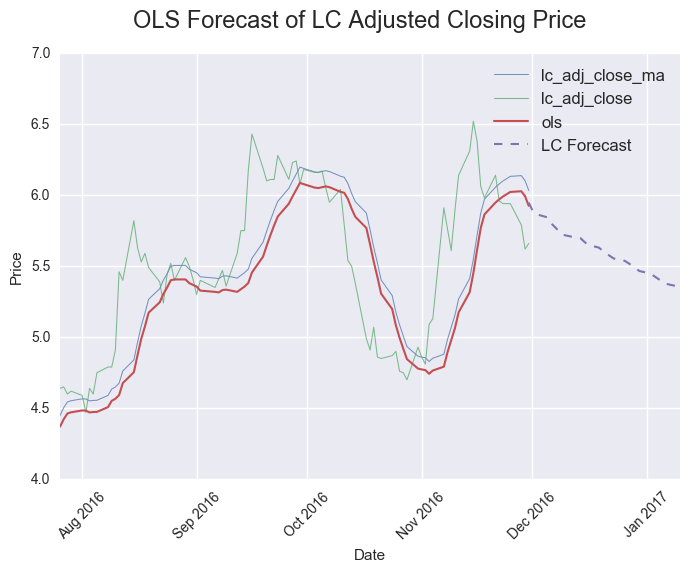

In [32]:
#plot the model
plt.plot(ma_preds, alpha = 0.75, lw = .75, label = 'lc_adj_close_ma')
plt.plot(ys, alpha = 0.75, lw = .75, label = 'lc_adj_close')
plt.plot(index_days, model_preds, lw = 1.5, label = 'ols')
plt.plot(df2.lc_forecast, lw = 1.5, ls = 'dashed', label = 'LC Forecast')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Price')
plt.suptitle('OLS Forecast of LC Adjusted Closing Price', size = 17)
plt.legend(loc='upper right',prop={'size':12})
plt.show()

The model is doing the best that it can, but even 30 days seems a bit much for this simple of a model.

**Task 12:** Supervised machine learning

**a)** Using the 'Housing' dataset (defined below), train a model to predict a home's 'price'. You can predict the exact price or the price range that the house will fall in. 

**b)** Interpret the model. Is it a good model? What is it telling you?

**Note** This task is meant to be very open ended with the intent of evaluating your problem solving abilities and machine learning knowledge.

In [33]:
housing = pds('Housing')
housing.head()

price  lotsize  bedrooms  bathrms  stories driveway recroom fullbase  \
1 42000.000     5850         3        1        2      yes      no      yes   
2 38500.000     4000         2        1        1      yes      no       no   
3 49500.000     3060         3        1        1      yes      no       no   
4 60500.000     6650         3        1        2      yes     yes       no   
5 61000.000     6360         2        1        1      yes      no       no   

  gashw airco  garagepl prefarea  
1    no    no         1       no  
2    no    no         0       no  
3    no    no         0       no  
4    no    no         0       no  
5    no    no         0       no

In [34]:
housing.shape

(546, 12)

This is a very clean dataset. We can get right to work. The variables are:<br />
**price** - predictor<br />
**lotsize** - lot size in sq feet<br />
**bedrooms** - number of bedrooms<br />
**bathrms** - number of full bathrooms<br />
**stories** - number of stories excluding basement<br />
**driveway** - whether there is a driveway<br />
**recroom** - whether there is a recroom<br />
**fullbase** - whether there is a full basement<br />
**gashw** - is gas used for hot water heating<br />
**airco** - air conditioning<br />
**garagepl** - how many parking spots<br />
**prefarea** - located in preferred neighborhood<br />

Since we have over 500 observations, we'll use kfold cv and also use a hold out set of 20% for out of sample model selection. The hold out set is especially important if planning on removing outliers, etc. as we may not get a generalized view of model performance from kfold cv on the train set. While the hold out set has a higher variance of the error estimate than kfold, it is useful as a step in model selection and as a sanity check. </br>

Before beginning, let's deal with the categorical variables. We don't need to one hot encode any since they all make sense as increasing values, so let's just replace accordingly.

In [35]:
from sklearn.model_selection import train_test_split

#create hold out set
seed = 1
train, test = train_test_split(housing, test_size = 0.2, random_state = seed)

#replace yes with 1 and no with 0
train = train.replace('yes', 1)
train = train.replace('no', 0)
train.head()

price  lotsize  bedrooms  bathrms  stories  driveway  recroom  \
274 64900.000     4100         2        2        1         1        1   
41  66500.000     3745         3        1        2         1        0   
398 80750.000     6660         4        2        2         1        1   
340 62500.000     3900         3        1        2         1        0   
412 95000.000     6500         3        2        3         1        0   

     fullbase  gashw  airco  garagepl  prefarea  
274         1      0      0         0         0  
41          1      0      0         0         0  
398         1      0      0         1         1  
340         0      0      0         0         0  
412         0      0      1         0         1

In [36]:
train.describe()

price   lotsize  bedrooms  bathrms  stories  driveway  recroom  \
count    436.000   436.000   436.000  436.000  436.000   436.000  436.000   
mean   67598.491  5143.567     2.952    1.294    1.773     0.856    0.174   
std    26606.280  2160.386     0.730    0.517    0.850     0.352    0.380   
min    25000.000  1650.000     1.000    1.000    1.000     0.000    0.000   
25%    49000.000  3580.500     2.000    1.000    1.000     1.000    0.000   
50%    61000.000  4580.000     3.000    1.000    2.000     1.000    0.000   
75%    82000.000  6420.000     3.000    2.000    2.000     1.000    0.000   
max   190000.000 16200.000     6.000    4.000    4.000     1.000    1.000   

       fullbase   gashw   airco  garagepl  prefarea  
count   436.000 436.000 436.000   436.000   436.000  
mean      0.337   0.050   0.312     0.677     0.209  
std       0.473   0.219   0.464     0.868     0.407  
min       0.000   0.000   0.000     0.000     0.000  
25%       0.000   0.000   0.000     0.000     0.000  
50%       0.000   0.000   0.000     0.000     0.000  
75%       1.000   0.000   1.000     1.000     0.000  
max       1.000   1.000   1.000     3.000     1.000

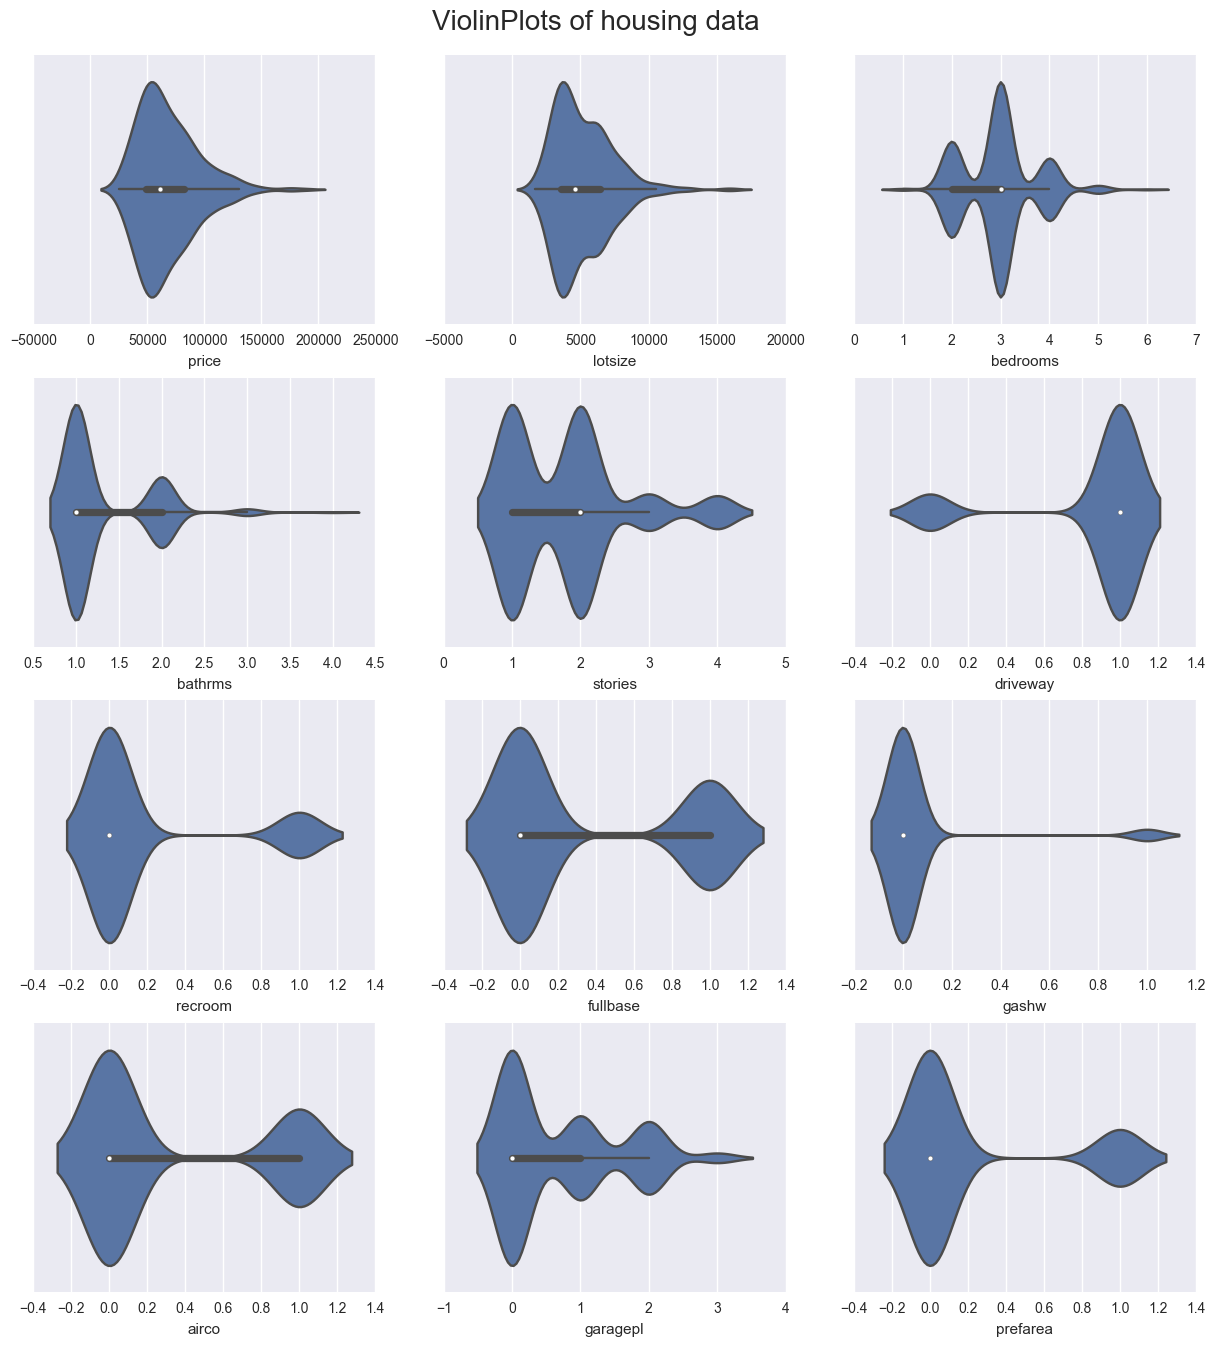

In [37]:
#setting subplot settings...there are 12 variables so we will do a 4x3 graph of violins
plt_height = 4
plt_width = 3
cols = list(train)
num_plts = len(cols)

#plotting
f, axarr = plt.subplots(plt_height, plt_width, figsize=(15,15))
f.suptitle('ViolinPlots of housing data', size = 20)
f.subplots_adjust(top = .95)

for i, col in enumerate(cols, start = 0):
    axis = axarr[divmod(i,plt_width)]
    sns.violinplot(train[col], ax = axis)
    axis.set_xlabel(col)

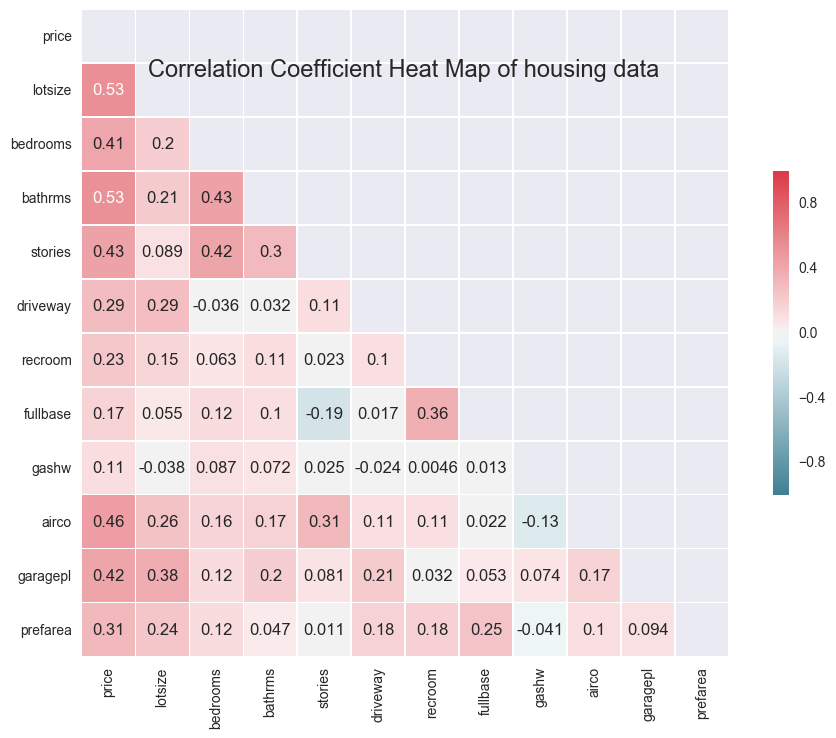

In [38]:
#using a heatmap to visualize results
# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 7))
f.suptitle('Correlation Coefficient Heat Map of housing data', size = 17)
f.subplots_adjust(top = 1.05, right = 1.001)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

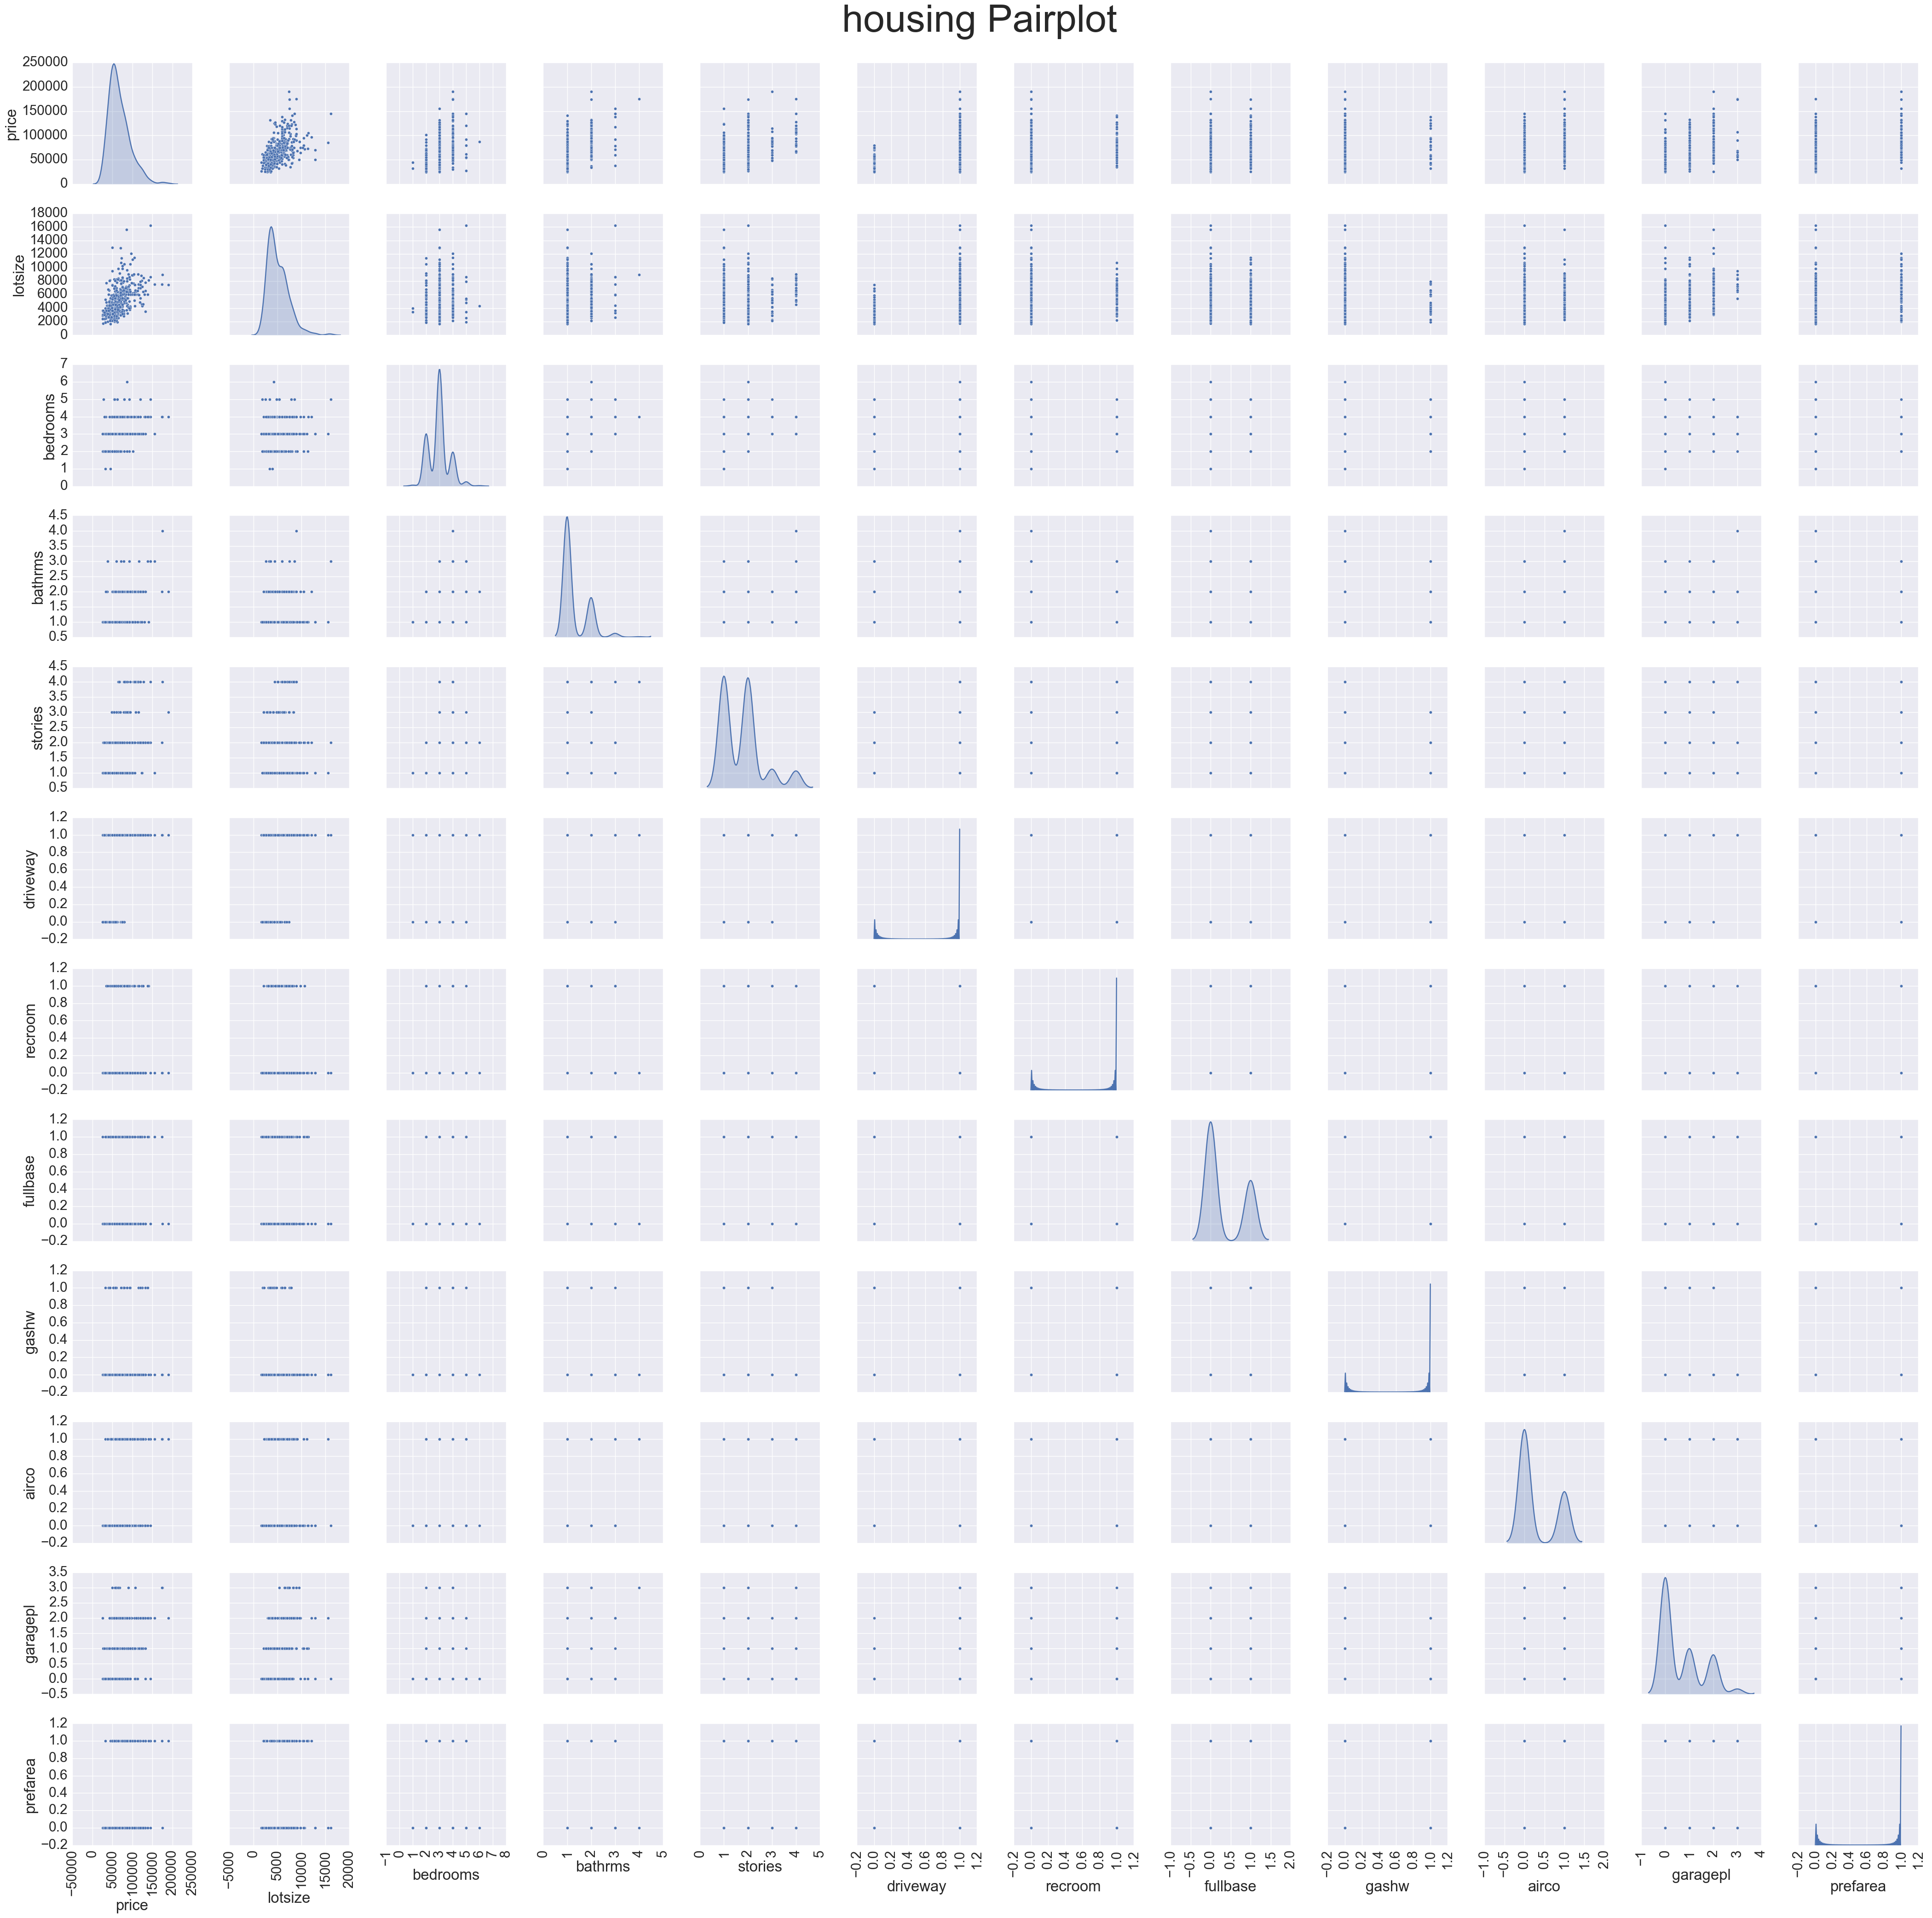

In [39]:
#plotting a pairplot

sns.set(font_scale=2.15)
g = sns.pairplot(train, size = 3.5, diag_kind = 'kde',diag_kws=dict(shade=True))
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

plt.suptitle('housing Pairplot', size =60)
plt.subplots_adjust(top = .95)

#reset fontscale
sns.set(font_scale=1)

Based off some initial analysis, we can see that most houses are located under $150,000 and most of the variables are positively correlated with price.

lotsize and price have a few extreme values - let's take a closer look.

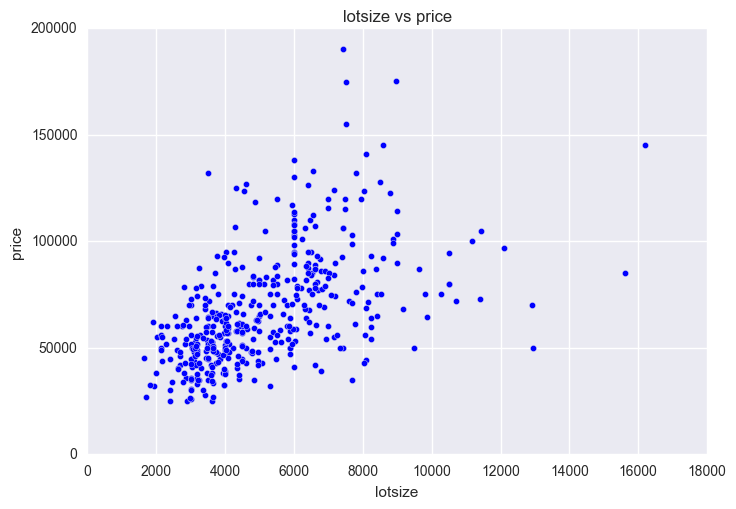

In [40]:
plt.scatter(train.lotsize, train.price)
plt.xlabel('lotsize')
plt.ylabel('price')
plt.title('lotsize vs price')

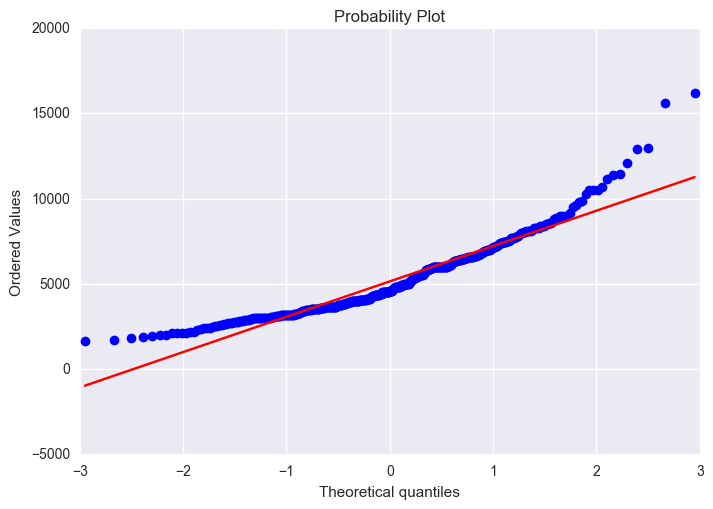

In [41]:
import pylab
scs.probplot(train.lotsize, dist="norm", plot=pylab)
pylab.show()

Let's see if we can transform lotsize to make it more normal

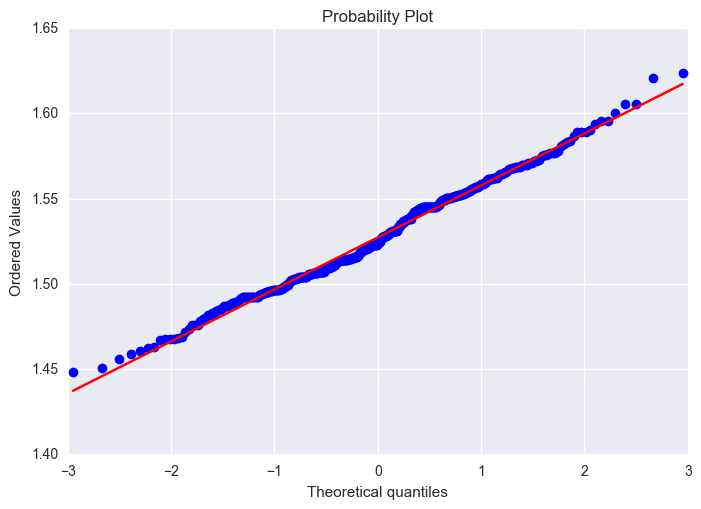

In [42]:
crazy_transformation = train.lotsize**(1/20.0)
scs.probplot(crazy_transformation, dist="norm", plot=pylab)
pylab.show()

We have made the distribution more normal, but at the price of some interpretability. When we look at the effect of the variable based on the Beta coefficient in OLS, we will have to keep in mind this transformation. 

We'll stick with OLS and random forest (the former being very interpretable, and the latter being good with categorical data) in this example, so we don't necessarily need to go to the hassle of normalizing data. It is useful for some models, but for OLS it is mainly useful for interpretability. Let's go ahead and predict price with OLS and interpret the model.

In [43]:
#make new transformation in df
train.lotsize = crazy_transformation
Xtrain = train.drop('price', axis = 1)
ytrain = train.price

from sklearn.linear_model import LinearRegression
from sklearn import model_selection

seed = 1
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LinearRegression()

#we'll use RMSE to evaluate the models since this is common with regression and makes sense in our situation
results = model_selection.cross_val_score(model, Xtrain, ytrain, cv=kfold, scoring = 'neg_mean_squared_error' , n_jobs = -1)
print 'OLS price prediction RMSE: {0:.1f} ({1:.1f})'.format(np.mean(np.sqrt(results*-1)), np.sqrt(results.std()))

OLS price prediction RMSE: 15221.0 (8855.2)


In [44]:
ols_model = sm.OLS(ytrain, Xtrain).fit()

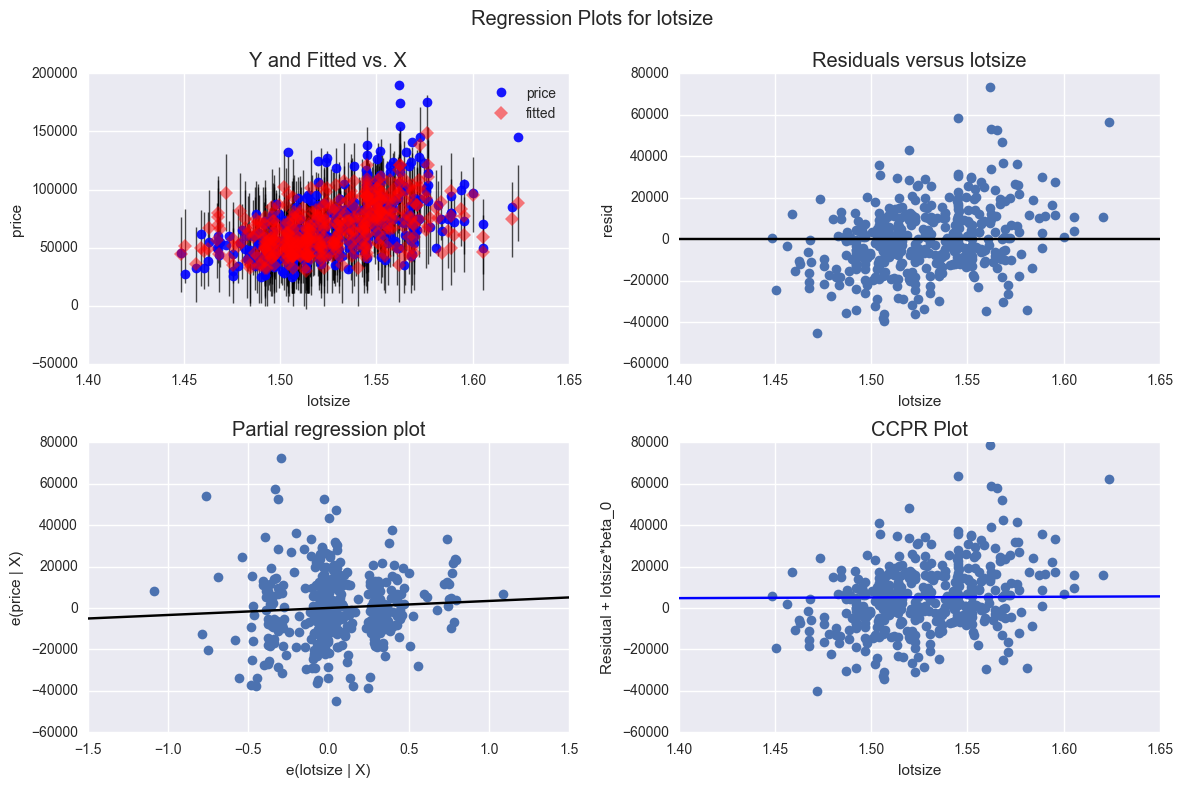

In [45]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(ols_model, "lotsize", fig=fig)

Oops! Our residuals look to be heteroskedastic! This would mean that we are still violating basic inference assumptions and even BLUE assumption which will affect our prediction accuracy. This is something else that can be added to our list of future steps (see the bottom) but we won't dive more into it in this small example.

In [46]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     754.9
Date:                Wed, 22 Feb 2017   Prob (F-statistic):          5.72e-271
Time:                        14:44:05   Log-Likelihood:                -4840.0
No. Observations:                 436   AIC:                             9702.
Df Residuals:                     425   BIC:                             9747.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
lotsize     3389.1421   2614.698      1.296      0.196     -1750.207  8528.491
bedrooms    2672.2266   1298.222      2.058      0.040       120.491  5223.963
bathrms      1.56e+04   1728.883      9.023      0.000      1.22e+04   1.9e+04
stories     6028.9298   1111.580      5.424      0.000      3844.050  8213.809
driveway     1.07e+04   2357.842      4.537      0.000      6062.602  1.53e+04
recroom     5331.1592   2237.806      2.382      0.018       932.614  9729.704
fullbase    3768.2181   1892.869      1.991      0.047        47.667  7488.769
gashw       1.287e+04   3629.536      3.545      0.000      5734.108     2e+04
airco       1.492e+04   1826.017      8.170      0.000      1.13e+04  1.85e+04
garagepl    6808.7724    948.763      7.176      0.000      4943.920  8673.624
prefarea    1.201e+04   2035.130      5.902      0.000      8011.853   1.6e+04
==============================================================================
Omnibus:                       39.183   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.191
Skew:                           0.545   Prob(JB):                     1.28e-16
Kurtosis:                       4.686   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interestingly, lotsize is not statistically significant, but as we saw earlier, our assumption of homoskedasticity of residuals is broken, so standard errors will be off. For now, inference is off the table and we can also improve the prediction a bit based on Gauss Markov BLUE assumptions. For this small example, I will leave the error as is and leave it as a future step (as there are many!). 

In [47]:
#Let's fit a random forest
#RFs deal well with categorical variables, so I am interested to see if RF can do better than OLS

from sklearn.ensemble import RandomForestRegressor

seed = 1
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestRegressor(n_estimators = 1000, max_depth = None, n_jobs = -1)
results = model_selection.cross_val_score(model, Xtrain, ytrain, cv=kfold, scoring = 'neg_mean_squared_error' , n_jobs = -1)
print 'RF price prediction RMSE: {0:.1f} ({1:.1f})'.format(np.mean(np.sqrt(results*-1)), np.sqrt(results.std()))

RF price prediction RMSE: 16701.1 (11917.6)


RF is not doing as well as OLS with a much higher variance. This can be attributed to the linear nature of the problem.

Feature ranking:
1. lotsize (0.473371)
2. bathrms (0.178011)
3. garagepl (0.071060)
4. stories (0.054033)
5. airco (0.052749)
6. bedrooms (0.046116)
7. prefarea (0.036646)
8. fullbase (0.030766)
9. recroom (0.023566)
10. gashw (0.021754)
11. driveway (0.011928)


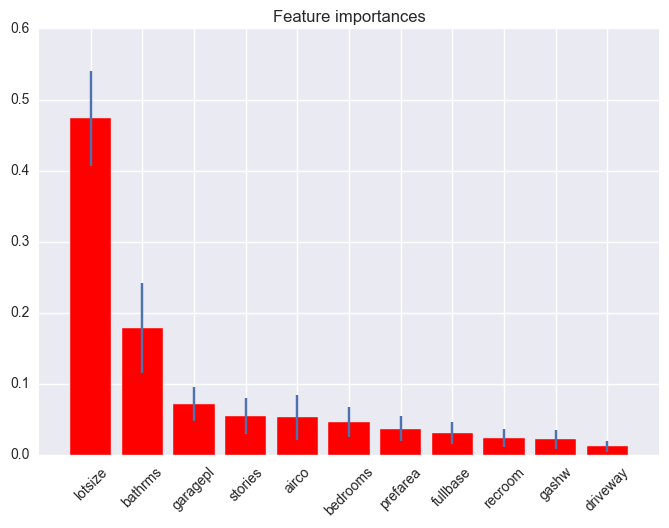

In [48]:
#Let's look at what insights the RF picked up

# Build a forest on all train data and compute the feature importances
forest = RandomForestRegressor(n_estimators=1000, max_depth = None, n_jobs = -1, random_state=seed)

forest.fit(Xtrain, ytrain)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
features = [list(Xtrain.columns)[i] for i in indices]

# Print the feature ranking
print("Feature ranking:")

for f in range(Xtrain.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(Xtrain.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(Xtrain.shape[1]), features, rotation = 45)
plt.xlim([-1, Xtrain.shape[1]])
plt.show()

lotsize and # of bathrooms are most important (they were also most correlated with price), although garage parking places could be argued to factor in. <br/>

I would guess that we can pick up most of the importance from the lot size and the house size (number of bathrooms - house size inferred).

Let's now test on the hold out set.

In [49]:
#first apply the same transformations to the hold out set
test = test.replace('yes', 1)
test = test.replace('no', 0)
test.lotsize = test.lotsize**(1/20.0)

Xtest = test.drop('price', axis = 1)
ytest = test.price

#we've retrained on the full dataset with RF, which will give us a bit better results
#but let's do it with OLS as well (with sklearn this time, for consistency)
ols_model = LinearRegression().fit(Xtrain, ytrain)

#our hold out set predictions
forest_preds = forest.predict(Xtest)
ols_preds = ols_model.predict(Xtest)

#RMSE evaluation
forest_rmse = np.sqrt(mean_squared_error(ytest, forest_preds))
ols_rmse = np.sqrt(mean_squared_error(ytest, ols_preds))

print 'OLS price prediction test set RMSE: {0:.1f}'.format(ols_rmse)
print 'RF price prediction test set RMSE: {0:.1f}'.format(forest_rmse)

OLS price prediction test set RMSE: 16477.7
RF price prediction test set RMSE: 17963.6


Both models performed within specification based on kfold cv (most of the time models will perform a little worse on out of sample tests) and of course OLS is better than RF which again can be contributed to the linear nature of the problem. In this small example I am only using 2 models, but normally you would have a few to test and with more time put in to create each one.

**Next Steps:**</br>
* fix heteroskedasticity so that Gauss-Markov BLUE assumptions are met
* do some more feature engineering such as multiplying variables or adding indicators
* RF may do better with one hot encoded categorical variables
* adding boosting to decision forest
* AIC/BIC and other forward/backward stepwise regression techniques or Lasso/ridge after feature engineering for reducing complexity
* ensembling